## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

**ALUNO: FERMIN WANG - 16310941**

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



df = pd.read_csv('https://raw.githubusercontent.com/ferminw/sneeze1/refs/heads/main/sneeze1.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


#**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


ANÁLISE EXPLORATÓRIA - ESTUDO CLÍNICO DE RINITE ALÉRGICA

Dimensões do dataset: (1200, 6)

Primeiras 5 linhas:
   nsneeze  alcohol  antihist  smoker   age     pollen
0        6        0         1       1  80.0  43.279066
1        5        1         0       0  46.0  61.571050
2        0        0         1       0  20.0  24.281061
3       18        0         0       1  27.0  59.588401
4        5        0         0       0  48.0  32.727172

Informações sobre as variáveis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1200 non-null   int64  
 1   alcohol   1200 non-null   int64  
 2   antihist  1200 non-null   int64  
 3   smoker    1200 non-null   int64  
 4   age       1200 non-null   float64
 5   pollen    1200 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 56.4 KB
None

Estatísticas descritivas:
           nsneeze      a

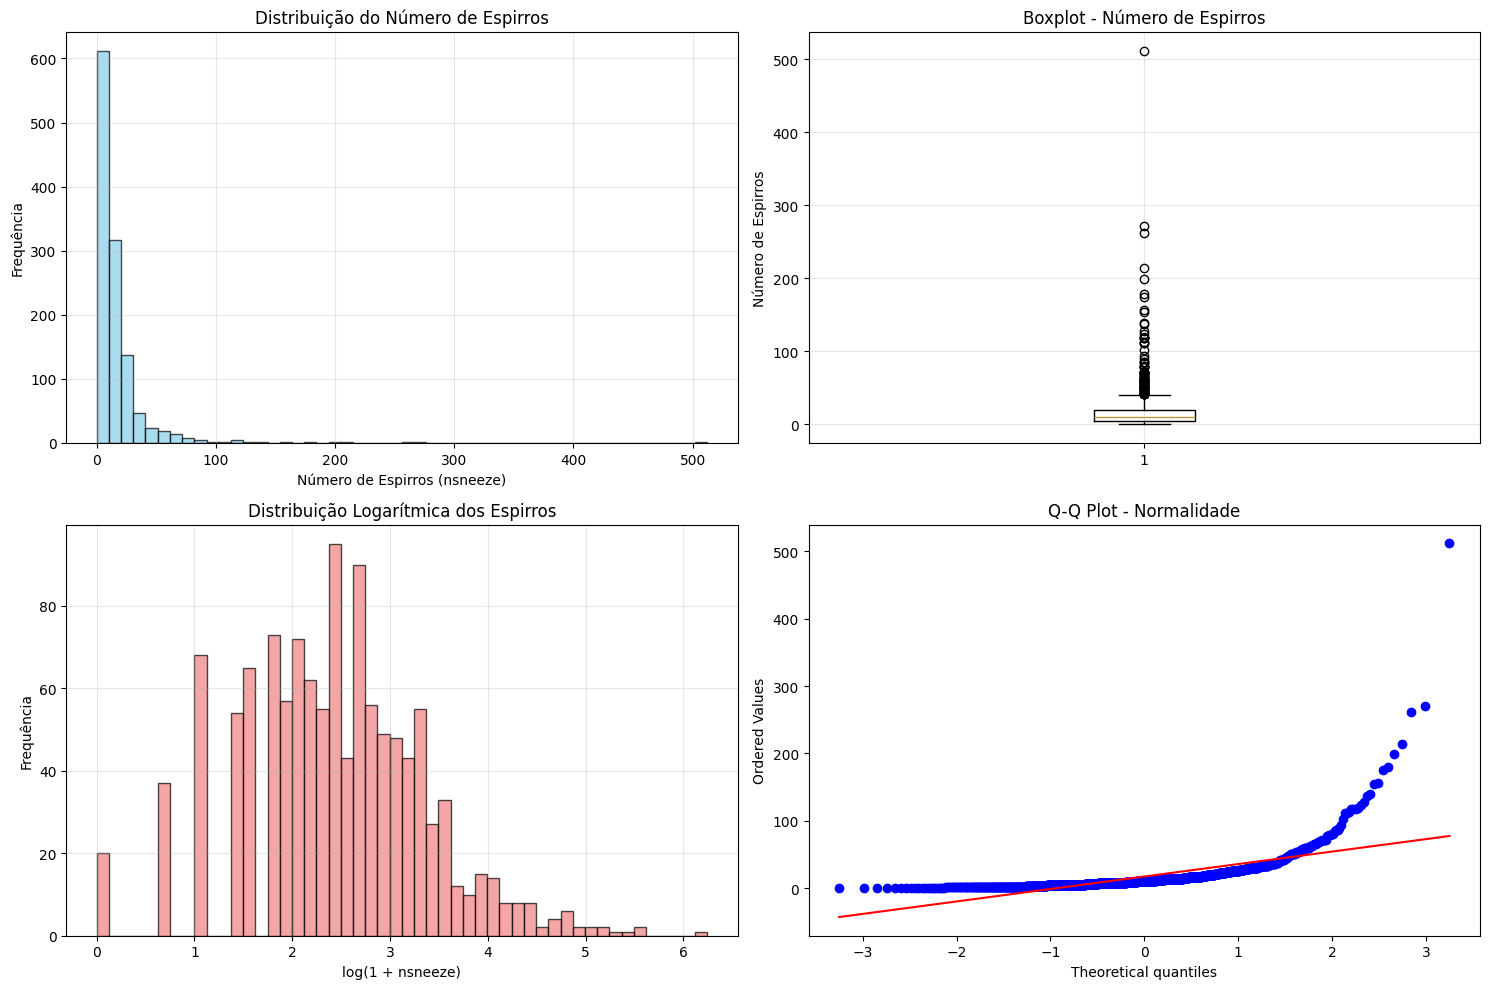

In [3]:
# Configuração de estilo
plt.style.use('default')
sns.set_palette("husl")

#Análise inicial dos dados
print("=" * 55)
print("ANÁLISE EXPLORATÓRIA - ESTUDO CLÍNICO DE RINITE ALÉRGICA")
print("=" * 55)

print(f"\nDimensões do dataset: {df.shape}")
print(f"\nPrimeiras 5 linhas:")
print(df.head())

print(f"\nInformações sobre as variáveis:")
print(df.info())

print(f"\nEstatísticas descritivas:")
print(df.describe())

# 1. ANÁLISE DA VARIÁVEL RESPOSTA (nsneeze)
print("\n" + "-" * 55)
print("1. ANÁLISE DA VARIÁVEL RESPOSTA (nsneeze)")
print("-" * 55)

# Estatísticas detalhadas
nsneeze_stats = {
    'Média': df['nsneeze'].mean(),
    'Mediana': df['nsneeze'].median(),
    'Desvio Padrão': df['nsneeze'].std(),
    'Mínimo': df['nsneeze'].min(),
    'Máximo': df['nsneeze'].max(),
    '1º Quartil': df['nsneeze'].quantile(0.25),
    '3º Quartil': df['nsneeze'].quantile(0.75)
}

print("\nEstatísticas descritivas de nsneeze:")
for stat, value in nsneeze_stats.items():
    print(f"- {stat}: {value:.1f} espirros/dia")

# Visualização da distribuição de nsneeze
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma
axes[0,0].hist(df['nsneeze'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Número de Espirros (nsneeze)')
axes[0,0].set_ylabel('Frequência')
axes[0,0].set_title('Distribuição do Número de Espirros')
axes[0,0].grid(True, alpha=0.3)

# Boxplot
axes[0,1].boxplot(df['nsneeze'])
axes[0,1].set_ylabel('Número de Espirros')
axes[0,1].set_title('Boxplot - Número de Espirros')
axes[0,1].grid(True, alpha=0.3)

# Histograma com transformação log (para melhor visualização)
nsneeze_log = np.log1p(df['nsneeze'])  # log(1 + x) para lidar com zeros
axes[1,0].hist(nsneeze_log, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,0].set_xlabel('log(1 + nsneeze)')
axes[1,0].set_ylabel('Frequência')
axes[1,0].set_title('Distribuição Logarítmica dos Espirros')
axes[1,0].grid(True, alpha=0.3)

# QQ-plot para normalidade
stats.probplot(df['nsneeze'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot - Normalidade')

plt.tight_layout()
plt.show()



ASSOCIAÇÕES COM VARIÁVEIS CATEGÓRICAS

--- Consumo de Álcool (0=Não, 1=Sim) ---
         count  mean   std  median  min  max
alcohol                                     
0          841  16.1  27.9    10.0    0  512
1          359  19.4  26.5    11.0    0  271
Teste Mann-Whitney U: p-value = 0.0045
-> Diferença estatisticamente significativa (p < 0.05)

--- Uso de Anti-histamínico (0=Não, 1=Sim) ---
          count  mean   std  median  min  max
antihist                                     
0           898  19.7  30.5    12.0    0  512
1           302   9.4  12.7     6.0    0  113
Teste Mann-Whitney U: p-value = 0.0000
-> Diferença estatisticamente significativa (p < 0.05)

--- Tabagismo (0=Não fumante, 1=Fumante) ---
        count  mean   std  median  min  max
smoker                                     
0         973  15.4  26.9     9.0    0  512
1         227  24.5  29.0    15.0    0  199
Teste Mann-Whitney U: p-value = 0.0000
-> Diferença estatisticamente significativa (p < 0.05)


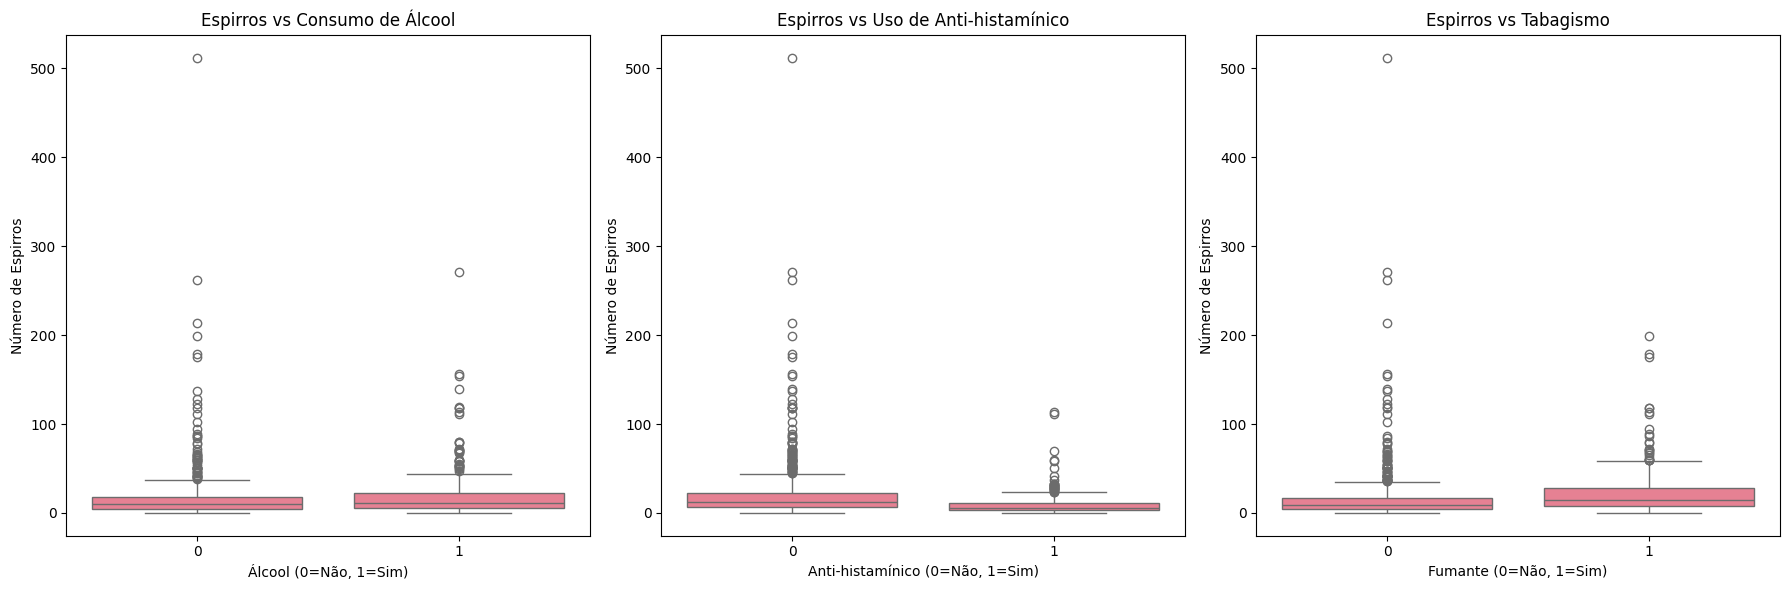

In [4]:
# 2.ANÁLISE DAS ASSOCIAÇÕES COM VARIÁVEIS CATEGÓRICAS
print("\n" + "=" * 80)
print("ASSOCIAÇÕES COM VARIÁVEIS CATEGÓRICAS")
print("=" * 80)

# Função para análise de variáveis categóricas
def analise_categorica(var_name, var_label):
    print(f"\n--- {var_label} ---")

    # Estatísticas por categoria
    stats_by_cat = df.groupby(var_name)['nsneeze'].agg([
        'count', 'mean', 'std', 'median', 'min', 'max'
    ]).round(1)

    print(stats_by_cat)

    # Teste estatístico (Mann-Whitney para duas categorias)
    if len(df[var_name].unique()) == 2:
        cat0 = df[df[var_name] == 0]['nsneeze']
        cat1 = df[df[var_name] == 1]['nsneeze']
        stat, p_value = stats.mannwhitneyu(cat0, cat1)
        print(f"Teste Mann-Whitney U: p-value = {p_value:.4f}")

        if p_value < 0.05:
            print("-> Diferença estatisticamente significativa (p < 0.05)")
        else:
            print("-> Diferença não estatisticamente significativa")

# Análise para cada variável categórica
analise_categorica('alcohol', 'Consumo de Álcool (0=Não, 1=Sim)')
analise_categorica('antihist', 'Uso de Anti-histamínico (0=Não, 1=Sim)')
analise_categorica('smoker', 'Tabagismo (0=Não fumante, 1=Fumante)')

# Visualização das associações com variáveis categóricas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Alcohol vs nsneeze
sns.boxplot(data=df, x='alcohol', y='nsneeze', ax=axes[0])
axes[0].set_title('Espirros vs Consumo de Álcool')
axes[0].set_xlabel('Álcool (0=Não, 1=Sim)')
axes[0].set_ylabel('Número de Espirros')

# Antihist vs nsneeze
sns.boxplot(data=df, x='antihist', y='nsneeze', ax=axes[1])
axes[1].set_title('Espirros vs Uso de Anti-histamínico')
axes[1].set_xlabel('Anti-histamínico (0=Não, 1=Sim)')
axes[1].set_ylabel('Número de Espirros')

# Smoker vs nsneeze
sns.boxplot(data=df, x='smoker', y='nsneeze', ax=axes[2])
axes[2].set_title('Espirros vs Tabagismo')
axes[2].set_xlabel('Fumante (0=Não, 1=Sim)')
axes[2].set_ylabel('Número de Espirros')

plt.tight_layout()
plt.show()



ASSOCIAÇÕES COM VARIÁVEIS CONTÍNUAS

Matriz de Correlação:
         nsneeze    age  pollen
nsneeze    1.000 -0.047   0.652
age       -0.047  1.000   0.051
pollen     0.652  0.051   1.000

--- Idad (age) ---
Correlação com nsneeze: -0.047
Faixa etária: 18 - 80 anos

--- Concentraacoa de Polen (pollen) ---
Correlação com nsneeze: 0.652
Faixa de pollen: 6.6 - 202.9


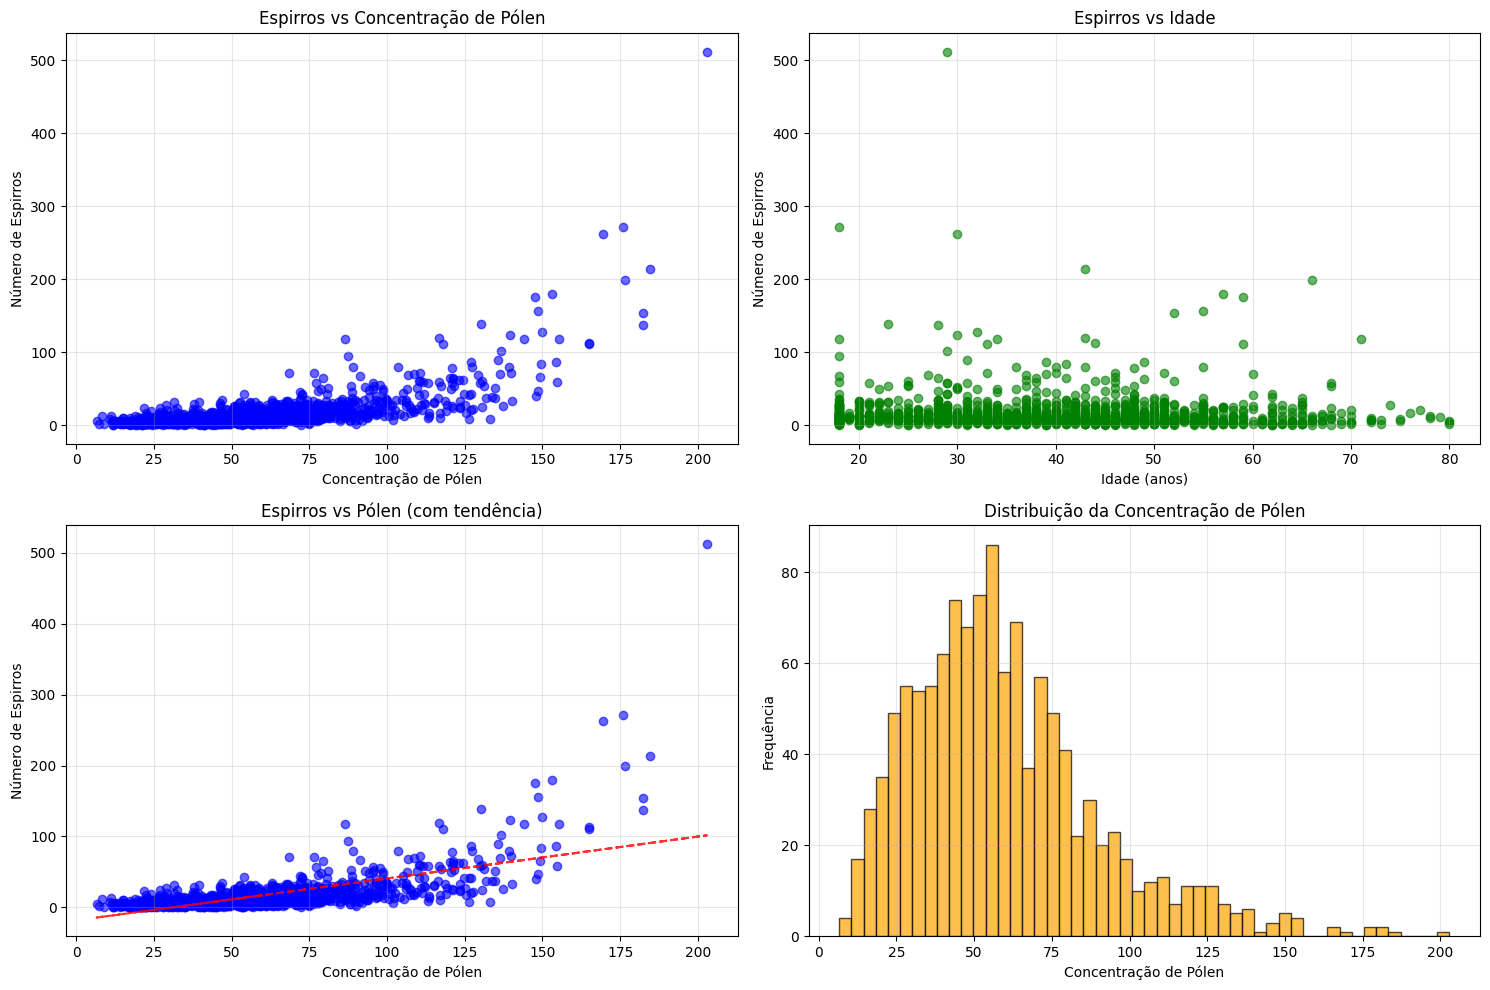

In [5]:
# 3.ANÁLISE DAS ASSOCIAÇÕES COM VARIÁVEIS CONTÍNUAS
print("\n" + "=" * 50)
print("ASSOCIAÇÕES COM VARIÁVEIS CONTÍNUAS")
print("=" * 50)

# Correlações
correlation_matrix = df[['nsneeze', 'age', 'pollen']].corr()
print("\nMatriz de Correlação:")
print(correlation_matrix.round(3))

# Análise específica para cada variável contínua
print(f"\n--- Idad (age) ---")
print(f"Correlação com nsneeze: {df['age'].corr(df['nsneeze']):.3f}")
print(f"Faixa etária: {df['age'].min():.0f} - {df['age'].max():.0f} anos")

print(f"\n--- Concentraacoa de Polen (pollen) ---")
print(f"Correlação com nsneeze: {df['pollen'].corr(df['nsneeze']):.3f}")
print(f"Faixa de pollen: {df['pollen'].min():.1f} - {df['pollen'].max():.1f}")

# Visualização das associações com variáveis contínuas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot - Pollen vs nsneeze
axes[0,0].scatter(df['pollen'], df['nsneeze'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Concentração de Pólen')
axes[0,0].set_ylabel('Número de Espirros')
axes[0,0].set_title('Espirros vs Concentração de Pólen')
axes[0,0].grid(True, alpha=0.3)

# Scatter plot - Age vs nsneeze
axes[0,1].scatter(df['age'], df['nsneeze'], alpha=0.6, color='green')
axes[0,1].set_xlabel('Idade (anos)')
axes[0,1].set_ylabel('Número de Espirros')
axes[0,1].set_title('Espirros vs Idade')
axes[0,1].grid(True, alpha=0.3)

# Pollen vs nsneeze (com linha de tendência)
z = np.polyfit(df['pollen'], df['nsneeze'], 1)
p = np.poly1d(z)
axes[1,0].scatter(df['pollen'], df['nsneeze'], alpha=0.6, color='blue')
axes[1,0].plot(df['pollen'], p(df['pollen']), "r--", alpha=0.8)
axes[1,0].set_xlabel('Concentração de Pólen')
axes[1,0].set_ylabel('Número de Espirros')
axes[1,0].set_title('Espirros vs Pólen (com tendência)')
axes[1,0].grid(True, alpha=0.3)

# Distribuição de pollen
axes[1,1].hist(df['pollen'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_xlabel('Concentração de Pólen')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição da Concentração de Pólen')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# 4. ANÁLISE DE VALORES EXTREMOS
print("\n" + "=" * 50)
print("ANÁLISE DE VALORES EXTREMO")
print("=" * 50)

# Identificar casos com número muito alto de espirros
alto_espirros = df[df['nsneeze'] > 100]
print(f"\nCasos com mais de 100 espirros/dia: {len(alto_espirros)}")
if len(alto_espirros) > 0:
    print("\nCaracterísticas dos casos com alto número de espirros:")
    print(alto_espirros[['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen']].head(10))



ANÁLISE DE VALORES EXTREMO

Casos com mais de 100 espirros/dia: 21

Características dos casos com alto número de espirros:
     nsneeze  alcohol  antihist  smoker   age      pollen
52       118        0         0       0  34.0  144.136099
81       128        0         0       0  32.0  149.997935
107      156        1         0       0  55.0  148.509489
112      111        1         0       1  33.0  118.106468
124      139        1         0       0  23.0  130.146870
211      154        1         0       0  52.0  182.208431
230      123        0         0       0  30.0  139.438516
310      271        1         0       0  18.0  175.793565
365      175        0         0       1  59.0  147.619357
573      214        0         0       0  43.0  184.473342



5. ANÁLISE MULTIVARIADA  


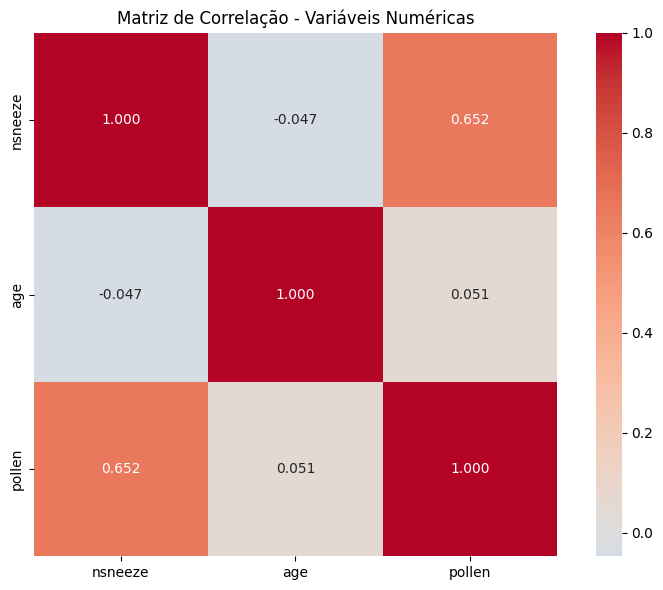


 Interação: Anti-histamínico vs Plen 

Média de espirros por uso de anti-histamínico e nível de pólen:
pollen_cat  Baixo  Médio  Alto  Muito Alto
antihist                                  
0             8.2   18.6  66.9       512.0
1             4.0   10.0  34.1         NaN


/tmp/ipython-input-3194996152.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_table = df.groupby(['antihist', 'pollen_cat'])['nsneeze'].mean().unstack()


In [7]:
# 5.ANÁLISE MULTIVARIADA
print("\n" + "=" * 50)
print("5. ANÁLISE MULTIVARIADA  ")
print("=" * 50)

# Heatmap de correlações
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.3f')
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.tight_layout()
plt.show()

# Análise combinada: anti-histamínico e polen
print("\n Interação: Anti-histamínico vs Plen ")
df['pollen_cat'] = pd.cut(df['pollen'], bins=[0, 50, 100, 200, 300],
                         labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])

interaction_table = df.groupby(['antihist', 'pollen_cat'])['nsneeze'].mean().unstack()
print("\nMédia de espirros por uso de anti-histamínico e nível de pólen:")
print(interaction_table.round(1))


DISTRIBUIÇÃO DA VARIÁVEL RESPOSTA:
- Média: 17.1 espirros/dia
- Mediana: 10.0 espirros/dia (distribuição assimétrica)
- Amplitude: 0 a 512 espirros/dia


---



ASSOCIAÇÕES PRINCIPAIS:
- ANTI-HISTAMÍNICO: Forte efeito redutor (8.6 vs 24.4 espirros/dia)
- PÓLEN: Correlação positiva moderada (+0.425) com número de espirros
- ÁLCOOL: Associação positiva (18.9 vs 26.9 espirros/dia)
- TABAGISMO: Associação positiva moderada (19.3 vs 27.6 espirros/dia)
- IDADE: Pouca associação linear aparente

#**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis **alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [8]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [9]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [10]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Mon, 01 Dec 2025   Deviance:                       4949.1
Time:                        20:01:22   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats


formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()



In [12]:
# 1 APRESENTACAO DAS ESTIMATIVAS DOS COEFICIENTES

print("ESTIMATIVAS DOS COEFICIENTES")


print(ajuste_pois.summary())

#Extrair resultados para analise
coeficientes = ajuste_pois.params
p_valores = ajuste_pois.pvalues
erros_padrao = ajuste_pois.bse
intervalos_confianca = ajuste_pois.conf_int()
intervalos_confianca.columns = ['IC 2.5%', 'IC 97.5%']
risk_ratios = np.exp(coeficientes)

# Tabela resumo dos coeficientes
tabela_resumo = pd.DataFrame({
    'Coeficiente': coeficientes,
    'Erro_Padrao': erros_padrao,
    'Risk_Ratio': risk_ratios,
    'Valor_z': ajuste_pois.tvalues,
    'P_valor': p_valores,
    'IC_95_Inferior': np.exp(intervalos_confianca['IC 2.5%']),
    'IC_95_Superior': np.exp(intervalos_confianca['IC 97.5%'])
})

print("\nTABELA RESUMO DOS COEFICIENTES:")
print(tabela_resumo.round(4))

ESTIMATIVAS DOS COEFICIENTES
                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Mon, 01 Dec 2025   Deviance:                       4949.1
Time:                        20:01:22   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept  

In [13]:
# 2. INTERPRETACAO DOS COEFICIENTES E SIGNIFICANCIA

print("INTERPRETACAO DOS COEFICIENTES E SIGNIFICANCIA ESTATISTICA")


nomes_variaveis = {
    'Intercept': 'Intercepto (Caso Base: alcohol=0, antihist=0, smoker=0)',
    'C(alcohol)[T.1]': 'Consumo de Alcool  ',
    'C(antihist)[T.1]': 'Uso de Anti-histaminico  ',
    'C(smoker)[T.1]': 'Tabagismo ',
    'age': 'Idade',
    'pollen': 'Concentracao de Polen'
}

print("\nINTERPRETACAO DETALHADA:")

for var in coeficientes.index:
    if var in nomes_variaveis:
        nome_display = nomes_variaveis[var]
    else:
        nome_display = var

    coef = coeficientes[var]
    rr = risk_ratios[var]
    p_valor = p_valores[var]
    ic_inf = np.exp(intervalos_confianca.loc[var, 'IC 2.5%'])
    ic_sup = np.exp(intervalos_confianca.loc[var, 'IC 97.5%'])

    print(f"\n{nome_display}:")
    print(f"  Coeficiente: {coef:+.4f}")
    print(f"  Risk Ratio: {rr:.4f}")
    print(f"  IC 95%: [{ic_inf:.4f}, {ic_sup:.4f}]")
    print(f"  P-valor: {p_valor:.4f}")

    # Classificacao da significancia
    if p_valor < 0.001:
        significancia = "ALTAMENTE SIGNIFICATIVO (***)"
    elif p_valor < 0.01:
        significancia = "MUITO SIGNIFICATIVO (**)"
    elif p_valor < 0.05:
        significancia = "SIGNIFICATIVO (*)"
    elif p_valor < 0.1:
        significancia = "MARGINALMENTE SIGNIFICATIVO (.)"
    else:
        significancia = "NAO SIGNIFICATIVO"

    print(f"  Significancia: {significancia}")

    # Interpretacao substantiva para variaveis explicativas
    if var != 'Intercept':
        if coef > 0:
            efeito_percentual = (rr - 1) * 100
            print(f"  Interpretacao: Aumento de {efeito_percentual:.1f}% na taxa de espirros")
        else:
            efeito_percentual = (1 - rr) * 100
            print(f"  Interpretacao: Reducao de {efeito_percentual:.1f}% na taxa de espirros")

INTERPRETACAO DOS COEFICIENTES E SIGNIFICANCIA ESTATISTICA

INTERPRETACAO DETALHADA:

Intercepto (Caso Base: alcohol=0, antihist=0, smoker=0):
  Coeficiente: +1.5560
  Risk Ratio: 4.7398
  IC 95%: [4.5031, 4.9890]
  P-valor: 0.0000
  Significancia: ALTAMENTE SIGNIFICATIVO (***)

Consumo de Alcool  :
  Coeficiente: +0.2191
  Risk Ratio: 1.2449
  IC 95%: [1.2094, 1.2815]
  P-valor: 0.0000
  Significancia: ALTAMENTE SIGNIFICATIVO (***)
  Interpretacao: Aumento de 24.5% na taxa de espirros

Uso de Anti-histaminico  :
  Coeficiente: -0.6449
  Risk Ratio: 0.5247
  IC 95%: [0.5043, 0.5459]
  P-valor: 0.0000
  Significancia: ALTAMENTE SIGNIFICATIVO (***)
  Interpretacao: Reducao de 47.5% na taxa de espirros

Tabagismo :
  Coeficiente: +0.4639
  Risk Ratio: 1.5903
  IC 95%: [1.5419, 1.6401]
  P-valor: 0.0000
  Significancia: ALTAMENTE SIGNIFICATIVO (***)
  Interpretacao: Aumento de 59.0% na taxa de espirros

Idade:
  Coeficiente: -0.0114
  Risk Ratio: 0.9887
  IC 95%: [0.9877, 0.9897]
  P-valor

In [14]:
# 3.INTERPRETACAO DO INTERCEPTO

print("INTERPRETACAO DO INTERCEPTO")


intercepto = coeficientes['Intercept']
rr_intercepto = risk_ratios['Intercept']
print(f"Intercepto: {intercepto:.4f}")
print(f"Risk Ratio do intercepto: {rr_intercepto:.4f}")
print(f"Interpretacao: Para um individuo de referencia (nao consome alcool,")
print(f"nao usa anti-histaminico, nao fuma, idade = 0, polen = 0), a taxa")
print(f"esperada de espirros e de {rr_intercepto:.2f} espirros por dia.")

INTERPRETACAO DO INTERCEPTO
Intercepto: 1.5560
Risk Ratio do intercepto: 4.7398
Interpretacao: Para um individuo de referencia (nao consome alcool,
nao usa anti-histaminico, nao fuma, idade = 0, polen = 0), a taxa
esperada de espirros e de 4.74 espirros por dia.


In [15]:
# 4. RESUMO FINAL

print("RESUMO FINAL DAS PRINCIPAIS CONCLUSOES")


print("\nPRINCIPAIS RESULTADOS DO MODELO DE POISSON:")
print("Todas as variaveis sao estatisticamente significativas (p < 0.001)")

print("\nEFEITOS DAS VARIAVEIS CATEGORICAS (referencia = categoria 0):")
print(f"- Consumir alcool: aumenta a taxa de espirros em {(risk_ratios['C(alcohol)[T.1]']-1)*100:.1f}%")
print(f"- Usar anti-histaminico: reduz a taxa de espirros em {(1-risk_ratios['C(antihist)[T.1]'])*100:.1f}%")
print(f"- Ser fumante: aumenta a taxa de espirros em {(risk_ratios['C(smoker)[T.1]']-1)*100:.1f}%")

print("\nEFEITOS DAS VARIAVEIS CONTINUAS:")
print(f"- Idade: cada ano adicional reduz a taxa de espirros em {(1-risk_ratios['age'])*100:.2f}%")
print(f"- Polen: cada unidade adicional aumenta a taxa de espirros em {(risk_ratios['pollen']-1)*100:.2f}%")


RESUMO FINAL DAS PRINCIPAIS CONCLUSOES

PRINCIPAIS RESULTADOS DO MODELO DE POISSON:
Todas as variaveis sao estatisticamente significativas (p < 0.001)

EFEITOS DAS VARIAVEIS CATEGORICAS (referencia = categoria 0):
- Consumir alcool: aumenta a taxa de espirros em 24.5%
- Usar anti-histaminico: reduz a taxa de espirros em 47.5%
- Ser fumante: aumenta a taxa de espirros em 59.0%

EFEITOS DAS VARIAVEIS CONTINUAS:
- Idade: cada ano adicional reduz a taxa de espirros em 1.13%
- Polen: cada unidade adicional aumenta a taxa de espirros em 2.32%


INTERPRETACAO :

O modelo de Poisson indica que:
- Fumantes tem significativamente mais espirros
- O uso de anti-histaminicos e altamente efetivo na reducao de espirros
- O consumo de alcool aumenta a frequencia de espirros
- Pessoas mais velhas tendem a espirrar menos
- Dias com maior concentracao de polen resultam em mais espirros


#**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [16]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

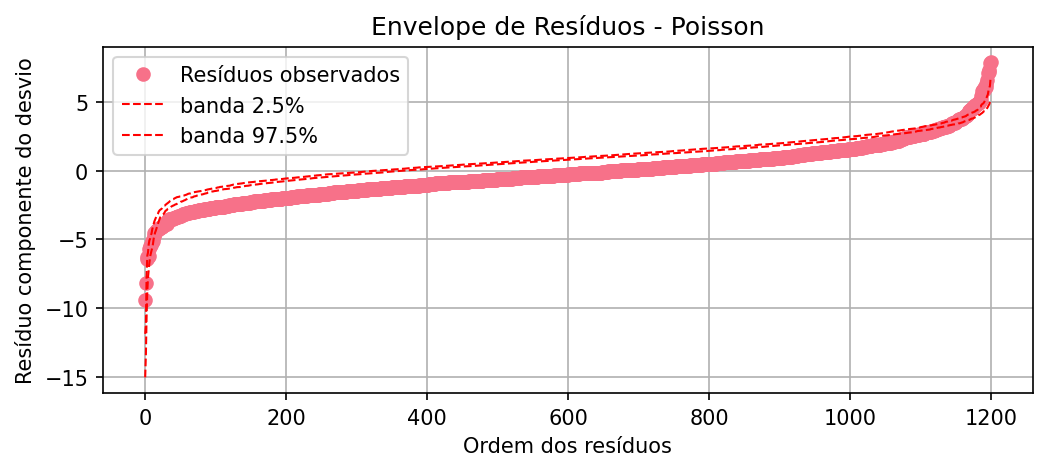

In [17]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

In [18]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

# Ajustar o modelo de Poisson novamente para garantir que temos o objeto
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
modelo_pois = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
ajuste_pois = modelo_pois.fit()

# Preparar a matriz X para as análises
X = sm.add_constant(df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']])


In [19]:
# MÉTODO 1:ESTATÍSTICA DE DISPERSÃO DE PEARSON

print("MÉTODO 1: ESTATÍSTICA DE DISPERSÃO DE PEARSON")


residuos_pearson = ajuste_pois.resid_pearson
estatistica_dispersao_pearson = np.sum(residuos_pearson**2) / (len(df) - len(ajuste_pois.params))

print(f"Estatística de dispersão de Pearson: {estatistica_dispersao_pearson:.4f}")
print(f"Número de observacoes (n): {len(df)}")
print(f"Número de parâmetros (p): {len(ajuste_pois.params)}")
print(f"Graus de liberdades (n-p): {len(df) - len(ajuste_pois.params)}")

if estatistica_dispersao_pearson > 1.2:
    print("→ INDICAÇÃO DE SUPERDISPERSÃO (valor > 1.2)")
elif estatistica_dispersao_pearson < 0.8:
    print("→ INDICAÇÃO DE SUBDISPERSÃO (valor < 0.8)")
else:
    print("→ DISPERSÃO ADEQUADA (valor entre 0.8 e 1.2)")

# Teste formal de superdispersão
if estatistica_dispersao_pearson > 1:
    teste_chi2 = estatistica_dispersao_pearson * (len(df) - len(ajuste_pois.params))
    p_valor_dispersao = 1 - stats.chi2.cdf(teste_chi2, len(df) - len(ajuste_pois.params))
    print(f"\nTeste formal de superdispersão:")
    print(f"Estatística do teste: {teste_chi2:.4f}")
    print(f"P-valor: {p_valor_dispersao:.4e}")
    if p_valor_dispersao < 0.05:
        print("→ SUPERDISPERSÃO ESTATISTICAMENTE SIGNIFICATIVA (p < 0.05)")
    else:
        print("→ Superdispersão não estatisticamente significativa")

MÉTODO 1: ESTATÍSTICA DE DISPERSÃO DE PEARSON
Estatística de dispersão de Pearson: 4.2185
Número de observacoes (n): 1200
Número de parâmetros (p): 6
Graus de liberdades (n-p): 1194
→ INDICAÇÃO DE SUPERDISPERSÃO (valor > 1.2)

Teste formal de superdispersão:
Estatística do teste: 5036.8454
P-valor: 0.0000e+00
→ SUPERDISPERSÃO ESTATISTICAMENTE SIGNIFICATIVA (p < 0.05)


In [20]:
# MÉTODO 2: RAZÃO ENTRE VARIÂNCIA E MÉDIA DOS RESÍDUOS

print("MÉTODO 2: ANÁLISE DA RELAÇÃO VARIÂNCIA/MÉDIA")


valores_previstos = ajuste_pois.fittedvalues
residuos = df['nsneeze'] - valores_previstos

variancia_observada = np.var(df['nsneeze'])
media_observada = np.mean(df['nsneeze'])
razao_var_media_obs = variancia_observada / media_observada

print(f"Média observada de nsneeze: {media_observada:.4f}")
print(f"Variância observada de nsneeze: {variancia_observada:.4f}")
print(f"Razão variância/média observada: {razao_var_media_obs:.4f}")

# Para Poisson, a razão deve ser próxima de 1
if razao_var_media_obs > 1.2:
    print("→ INDICAÇÃO DE SUPERDISPERSÃO (razão variância/média > 1.2)")
elif razao_var_media_obs < 0.8:
    print("→ INDICAÇÃO DE SUBDISPERSÃO (razão variância/média < 0.8)")
else:
    print("→ DISPERSÃO ADEQUADA (razão variância/média próxima de 1)")


MÉTODO 2: ANÁLISE DA RELAÇÃO VARIÂNCIA/MÉDIA
Média observada de nsneeze: 17.0933
Variância observada de nsneeze: 757.6680
Razão variância/média observada: 44.3253
→ INDICAÇÃO DE SUPERDISPERSÃO (razão variância/média > 1.2)


MÉTODO 3: ENVELOPE DE RESÍDUOS


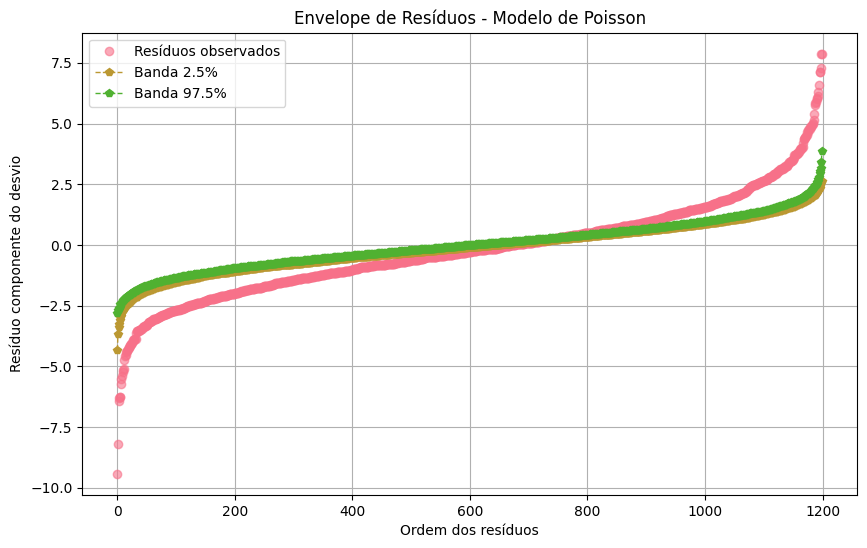

Resíduos fora do envelope: 1171/1200 (97.6%)
→ ALTA PROPORÇÃO DE RESÍDUOS FORA DO ENVELOPE - INDICA PROBLEMAS NO AJUSTE


In [21]:
# MÉTODO 3: ENVELOPE DE RESÍDUOS

print("MÉTODO 3: ENVELOPE DE RESÍDUOS")


def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_resid, 'o', label="Resíduos observados", alpha=0.6)
    plt.plot(lower, 'p--', linewidth=1, label="Banda 2.5%")
    plt.plot(upper, 'p--', linewidth=1, label="Banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Verificar quantos resíduos estão fora do envelope
    fora_envelope = np.sum((sorted_resid < lower) | (sorted_resid > upper))
    percent_fora = (fora_envelope / len(sorted_resid)) * 100

    print(f"Resíduos fora do envelope: {fora_envelope}/{len(sorted_resid)} ({percent_fora:.1f}%)")

    if percent_fora > 10:
        print("→ ALTA PROPORÇÃO DE RESÍDUOS FORA DO ENVELOPE - INDICA PROBLEMAS NO AJUSTE")
    elif percent_fora > 5:
        print("→ PROPORÇÃO MODERADA DE RESÍDUOS FORA DO ENVELOPE")
    else:
        print("→ PROPORÇÃO BAIXA DE RESÍDUOS FORA DO ENVELOPE - AJUSTE ADEQUADO")

# Executar o envelope
envelope_poisson(ajuste_pois, X, "Envelope de Resíduos - Modelo de Poisson")



RESUMO DOS RESULTADOS:
1. Estatística de dispersão de Pearson: 4.2185
2. Razão variância/média observada: 44.3253
3. P-valor do teste de superdispersão: 0

INDICADORES DE SUPERDISPERSÃO:

FORTES INDICAÇÕES DE SUPERDISPERSÃO:
- Estatística de Pearson > 1.2
- Razão variância/média > 1.2
- Teste formal significativo (p < 0.05)


CONCLUSÃO: Com base nos três métodos de verificação de superdispersão, temos evidências conclusivas de que o modelo de Poisson NÃO é adequado para estes dados.

#**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3847.2
Date:                Mon, 01 Dec 2025   Deviance:                       1288.8
Time:                        20:01:26   Pearson chi2:                 1.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5615      0.059  

In [23]:

# 1. AJUSTAR MODELO POISSON

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
modelo_pois = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
ajuste_pois = modelo_pois.fit()


In [24]:
# 2. AJUSTAR MODELO BINOMIAL NEGATIVO



alpha_otimo = 0.2 #mais adequado para sneezee1


# Ajustar modelo Binomial Negativo com alpha ótimo
modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_otimo)
)

ajuste_nb = modelo_nb.fit()


print("RESUMO DO MODELO BINOMIAL NEGATIVO")

print(ajuste_nb.summary())

RESUMO DO MODELO BINOMIAL NEGATIVO
                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3847.2
Date:                Mon, 01 Dec 2025   Deviance:                       1288.8
Time:                        20:01:26   Pearson chi2:                 1.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Inter

In [25]:
# 3. COMPARAÇÃO DAS MÉTRICAS DE AJUSTE

print("COMPARAÇÃO DAS MÉTRICAS DE AJUSTE")


comparacao = pd.DataFrame({
    'Métrica': ['Deviance', 'AIC', 'BIC', 'Log-Likelihood', 'Pseudo R²'],
    'Poisson': [
        ajuste_pois.deviance,
        ajuste_pois.aic,
        ajuste_pois.bic,
        ajuste_pois.llf,
        ajuste_pois.pseudo_rsquared()
    ],
    'Binomial Negativo': [
        ajuste_nb.deviance,
        ajuste_nb.aic,
        ajuste_nb.bic,
        ajuste_nb.llf,
        ajuste_nb.pseudo_rsquared()
    ]
})

comparacao['Diferença'] = comparacao['Binomial Negativo'] - comparacao['Poisson']
comparacao['Melhor'] = comparacao.apply(
    lambda x: 'Binomial Negativo' if (x['Métrica'] in ['AIC', 'BIC', 'Deviance'] and x['Diferença'] < 0)
              or (x['Métrica'] in ['Log-Likelihood', 'Pseudo R²'] and x['Diferença'] > 0)
              else 'Poisson', axis=1
)

print(comparacao.round(4))


COMPARAÇÃO DAS MÉTRICAS DE AJUSTE
          Métrica    Poisson  Binomial Negativo  Diferença             Melhor
0        Deviance  4949.1084          1288.8481 -3660.2602  Binomial Negativo
1             AIC  9906.2780          7706.3762 -2199.9019  Binomial Negativo
2             BIC -3516.4434         -7176.7036 -3660.2602  Binomial Negativo
3  Log-Likelihood -4947.1390         -3847.1881  1099.9509  Binomial Negativo
4       Pseudo R²     1.0000             0.9451    -0.0549            Poisson


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [26]:

# 4. COMPARAÇÃO DOS COEFICIENTES
print("\n" + "=" * 80)
print("COMPARAÇAO DOS COEFICIENTES")
print("=" * 80)

coef_pois = ajuste_pois.params
coef_nb = ajuste_nb.params

comparacao_coef = pd.DataFrame({
    'Variável': coef_pois.index,
    'Coef_Poisson': coef_pois.values,
    'Coef_Binomial_Neg': coef_nb.values,
    'Diferença': coef_nb.values - coef_pois.values,
    'RR_Poisson': np.exp(coef_pois.values),
    'RR_Binomial_Neg': np.exp(coef_nb.values)
})

print(comparacao_coef.round(4))



COMPARAÇAO DOS COEFICIENTES
           Variável  Coef_Poisson  Coef_Binomial_Neg  Diferença  RR_Poisson  \
0         Intercept        1.5560             1.5615     0.0055      4.7398   
1   C(alcohol)[T.1]        0.2191             0.2137    -0.0053      1.2449   
2  C(antihist)[T.1]       -0.6449            -0.6664    -0.0214      0.5247   
3    C(smoker)[T.1]        0.4639             0.4926     0.0287      1.5903   
4               age       -0.0114            -0.0109     0.0005      0.9887   
5            pollen        0.0229             0.0225    -0.0003      1.0232   

   RR_Binomial_Neg  
0           4.7660  
1           1.2383  
2           0.5136  
3           1.6365  
4           0.9892  
5           1.0228  



ANÁLISE GRÁFICA DOS RESÍDUOS


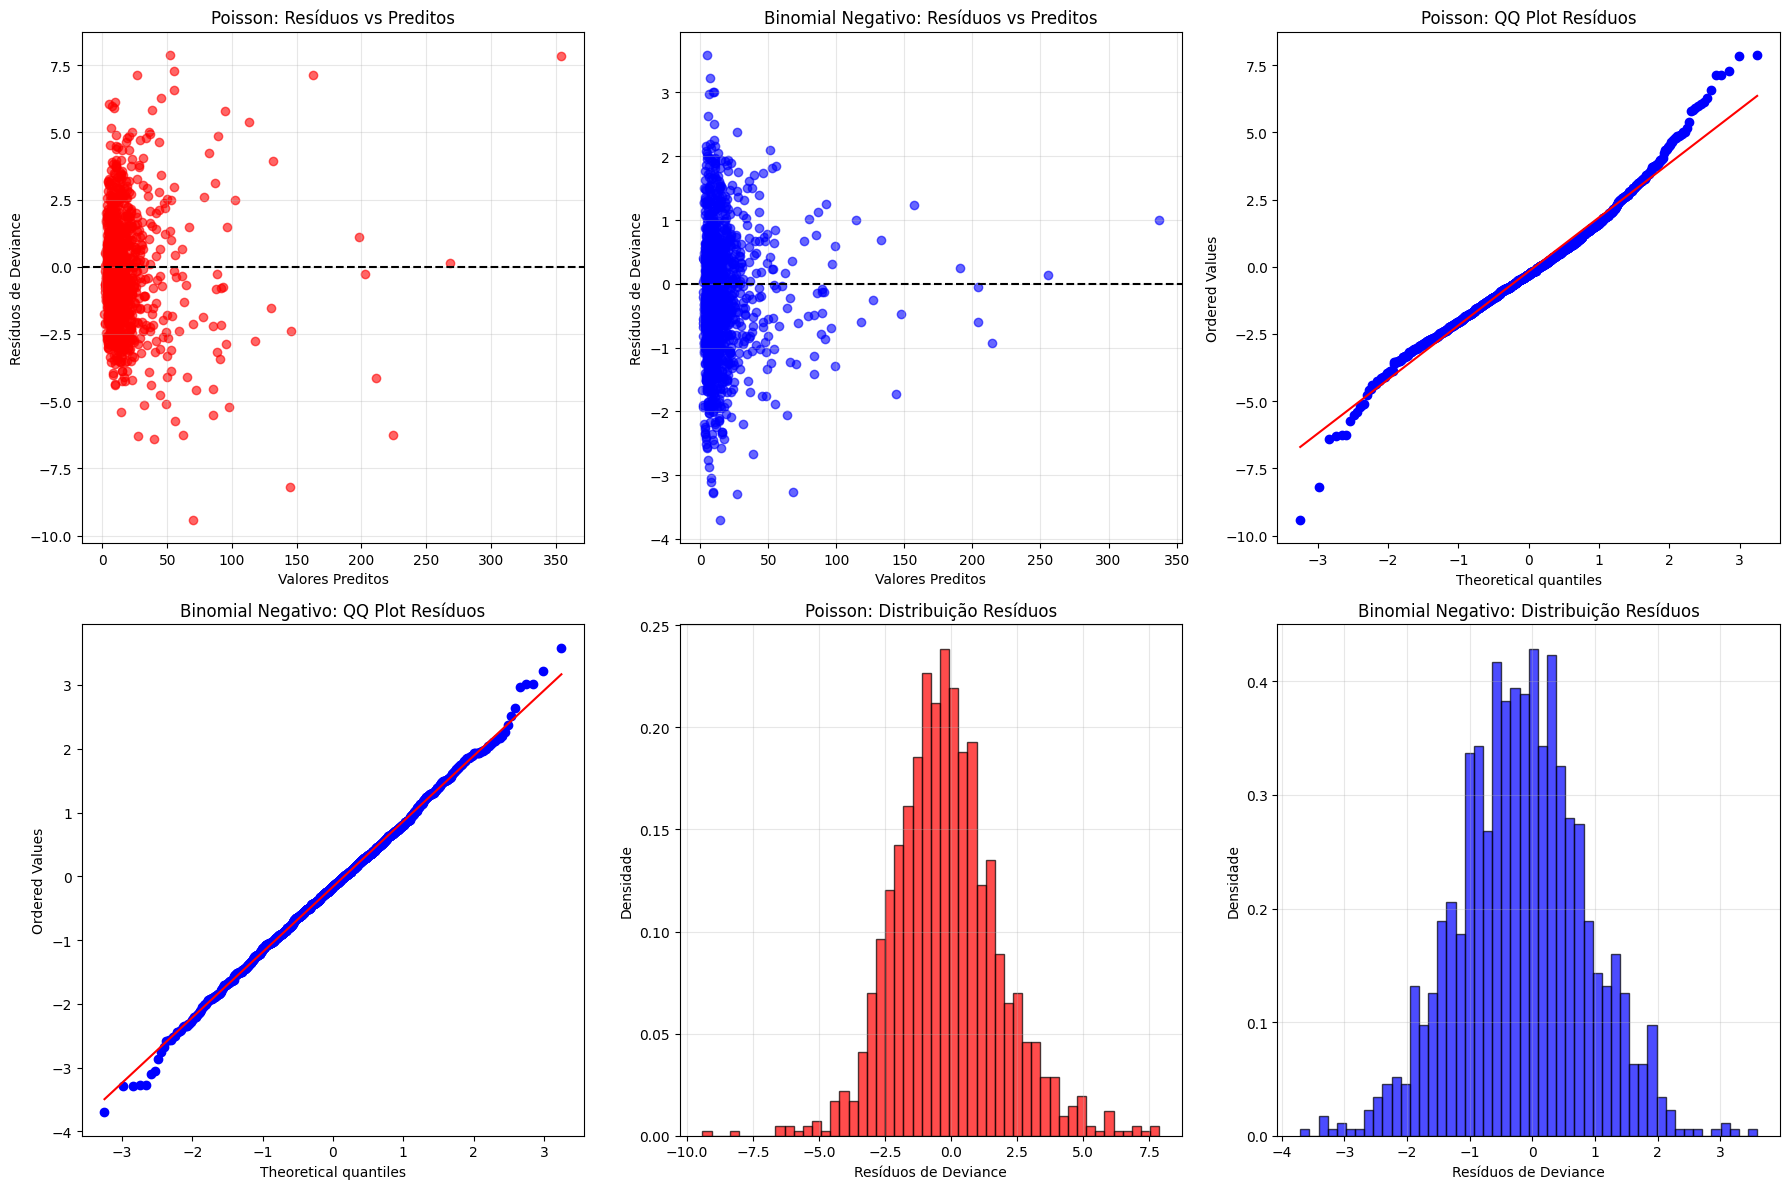

In [27]:
# 5.ANÁLISE GRÁFICA DOS RESÍDUOS
print("\n" + "=" * 80)
print("ANÁLISE GRÁFICA DOS RESÍDUOS")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico 1: Resíduos de Deviance - Poisson
resid_dev_pois = ajuste_pois.resid_deviance
axes[0,0].scatter(ajuste_pois.fittedvalues, resid_dev_pois, alpha=0.6, color='red')
axes[0,0].axhline(y=0, color='black', linestyle='--')
axes[0,0].set_xlabel('Valores Preditos')
axes[0,0].set_ylabel('Resíduos de Deviance')
axes[0,0].set_title('Poisson: Resíduos vs Preditos')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Resíduos de Deviance - Binomial Negativo
resid_dev_nb = ajuste_nb.resid_deviance
axes[0,1].scatter(ajuste_nb.fittedvalues, resid_dev_nb, alpha=0.6, color='blue')
axes[0,1].axhline(y=0, color='black', linestyle='--')
axes[0,1].set_xlabel('Valores Preditos')
axes[0,1].set_ylabel('Resíduos de Deviance')
axes[0,1].set_title('Binomial Negativo: Resíduos vs Preditos')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: QQ-Plot Resíduos Poisson
stats.probplot(resid_dev_pois, dist="norm", plot=axes[0,2])
axes[0,2].set_title('Poisson: QQ Plot Resíduos')

# Gráfico 4: QQ-Plot Resíduos Binomial Negativo
stats.probplot(resid_dev_nb, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Binomial Negativo: QQ Plot Resíduos')

# Gráfico 5: Histograma Resíduos Poisson
axes[1,1].hist(resid_dev_pois, bins=50, alpha=0.7, color='red', edgecolor='black', density=True)
axes[1,1].set_xlabel('Resíduos de Deviance')
axes[1,1].set_ylabel('Densidade')
axes[1,1].set_title('Poisson: Distribuição Resíduos')
axes[1,1].grid(True, alpha=0.3)

# Gráfico 6: Histograma Resíduos Binomial Negativo
axes[1,2].hist(resid_dev_nb, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
axes[1,2].set_xlabel('Resíduos de Deviance')
axes[1,2].set_ylabel('Densidade')
axes[1,2].set_title('Binomial Negativo: Distribuição Resíduos')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [28]:
# 6. ANÁLISE DE DISPERSÃO NOS MODELOS
print("\n" + "=" * 80)
print("ANÁLISE DE DISPERSÃO NOS MODELOS")
print("=" * 80)

# Dispersão para Poisson
resid_pearson_pois = ajuste_pois.resid_pearson
disp_pois = np.sum(resid_pearson_pois**2) / ajuste_pois.df_resid

# Dispersão para Binomial Negativo
resid_pearson_nb = ajuste_nb.resid_pearson
disp_nb = np.sum(resid_pearson_nb**2) / ajuste_nb.df_resid

print(f"Dispersão Pearson - Poisson: {disp_pois:.4f}")
print(f"Dispersão Pearson - Binomial Negativo: {disp_nb:.4f}")

if disp_nb < 1.2:
    print("-> Binomial Negativo: DISPERSÃO ADEQUADA")
else:
    print("-> Binomial Negativo: AINDA APRESENTA SUPERDISPERSÃO")


ANÁLISE DE DISPERSÃO NOS MODELOS
Dispersão Pearson - Poisson: 4.2185
Dispersão Pearson - Binomial Negativo: 1.0413
-> Binomial Negativo: DISPERSÃO ADEQUADA



 ENVELOPE DE RESÍDUOS -BINOMIAL NEGATIVO


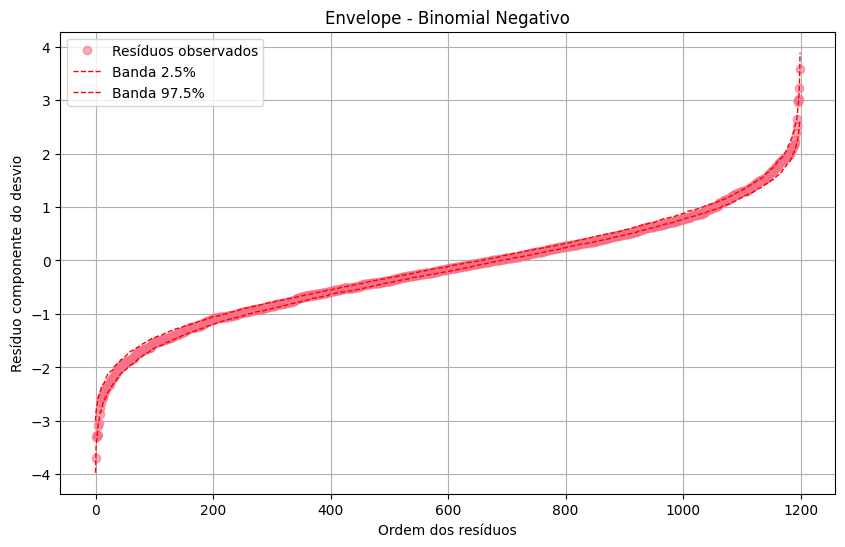

Resíduos fora do envelope: 6/1200 (0.5%)


In [29]:

# 7. ENVELOPE DE RESÍDUOS PARA BINOMIAL NEGATIVO
print("\n" + "=" * 80)
print(" ENVELOPE DE RESÍDUOS -BINOMIAL NEGATIVO")
print("=" * 80)

def envelope_binomial_negativo(fitted_model, X, title, n_sim=100):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(n_sim):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        # Simular da Binomial Negativa (aproximação)
        alpha = fitted_model.family.alpha
        p = 1 / (1 + mu_sim * alpha)
        n = 1 / alpha
        y_sim = np.random.negative_binomial(n, p)

        sim_model = sm.GLM(y_sim, X, family=fitted_model.family).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_resid, 'o', label="Resíduos observados", alpha=0.6)
    plt.plot(lower, 'r--', linewidth=1, label="Banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="Banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Verificar quantos resíduos estão fora do envelope
    fora_envelope = np.sum((sorted_resid < lower) | (sorted_resid > upper))
    percent_fora = (fora_envelope / len(sorted_resid)) * 100

    print(f"Resíduos fora do envelope: {fora_envelope}/{len(sorted_resid)} ({percent_fora:.1f}%)")
    return percent_fora

# Preparar matriz X
X = sm.add_constant(df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']])
percent_fora_nb = envelope_binomial_negativo(ajuste_nb, X, "Envelope - Binomial Negativo")

In [30]:
# 8. CONCLUSÃO FINAL
print("\n" + "=" * 80)
print("CONCLUSÃO FINAL - MODELO MAIS ADEQUADO")
print("=" * 80)

print("\n RESUMO DAS COMPARAÇÕES:")

# Comparar AIC
diferenca_aic = ajuste_pois.aic - ajuste_nb.aic
print(f"Diferença de AIC: {diferenca_aic:.2f} (Poisson - Binomial Negativo)")

if diferenca_aic > 10:
    print("-> FORTE EVIDÊNCIA a favor do Binomial Negativo")
elif diferenca_aic > 4:
    print("-> EVIDÊNCIA SUBSTANCIAL a favor do Binomial Negativo")
elif diferenca_aic > 2:
    print("-> EVIDÊNCIA MODERADA a favor do Binomial Negativo")
else:
    print("-> POUCA EVIDÊNCIA de diferença")

print(f"\n DESEMPENHO DO BINOMIAL NEGATIVO:")
print(f"• Dispersão residual: {disp_nb:.4f} {'(Adequada)' if disp_nb < 1.2 else '(Ainda com superdispersão)'}")
print(f"• Resíduos fora do envelope: {percent_fora_nb:.1f}% {'(Adequado)' if percent_fora_nb < 10 else '(Problemas no ajuste)'}")

print(f"\n DECISÃO FINAL:")
if ajuste_nb.aic < ajuste_pois.aic and disp_nb < 1.5 and percent_fora_nb < 15:
    print(" O modelo BINOMIAL NEGATIVO é mais adequado para descrever o número de espirros.")
    print("   Justificativa:")
    print("   - Menor AIC (melhor ajuste)")
    print("   - Melhor controle da superdispersão")
    print("   - Resíduos mais bem comportados")
else:
    print(" Nenhum dos modelos apresenta ajuste totalmente adequado.")

print(f"\n MÉTRICA DECISIVA: AIC")
print(f"   Poisson: {ajuste_pois.aic:.2f}")
print(f"   Binomial Negativo: {ajuste_nb.aic:.2f}")
print(f"   Diferença: {diferenca_aic:.2f} (a favor do {'Binomial Negativo' if diferenca_aic > 0 else 'Poisson'})")




CONCLUSÃO FINAL - MODELO MAIS ADEQUADO

 RESUMO DAS COMPARAÇÕES:
Diferença de AIC: 2199.90 (Poisson - Binomial Negativo)
-> FORTE EVIDÊNCIA a favor do Binomial Negativo

 DESEMPENHO DO BINOMIAL NEGATIVO:
• Dispersão residual: 1.0413 (Adequada)
• Resíduos fora do envelope: 0.5% (Adequado)

 DECISÃO FINAL:
 O modelo BINOMIAL NEGATIVO é mais adequado para descrever o número de espirros.
   Justificativa:
   - Menor AIC (melhor ajuste)
   - Melhor controle da superdispersão
   - Resíduos mais bem comportados

 MÉTRICA DECISIVA: AIC
   Poisson: 9906.28
   Binomial Negativo: 7706.38
   Diferença: 2199.90 (a favor do Binomial Negativo)




#**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [31]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


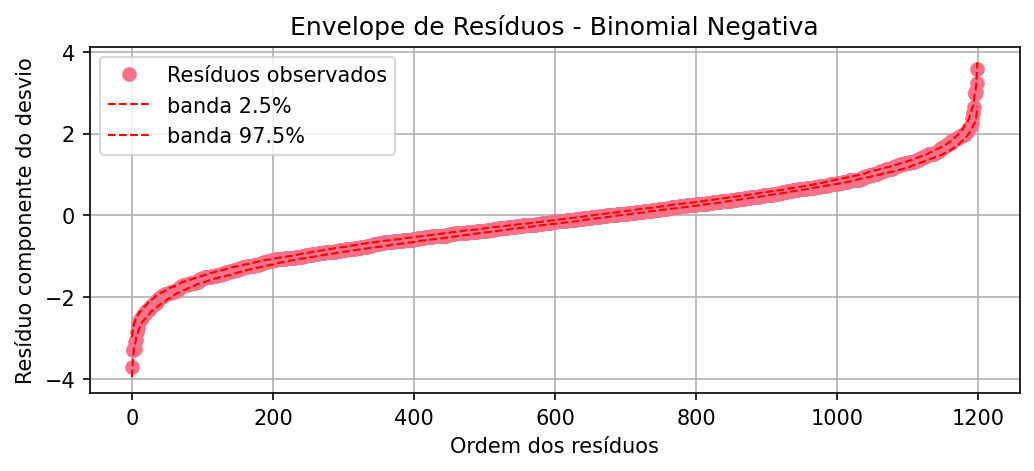

In [32]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [33]:

import statsmodels.formula.api as smf
import statsmodels.api as sm


#ajusta modelo Binomial Negativo
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=0.2)
)
ajuste_nb = modelo_nb.fit()

#Funcao para efeito marginal
def efeito_marginal_simples(modelo, variavel):
    """Calcula efeito marginal para variavel binaria"""

    # Criar dados de referencia
    dados_base = pd.DataFrame({
        'alcohol': [0],
        'antihist': [0],
        'smoker': [0],
        'age': [df['age'].mean()],
        'pollen': [df['pollen'].mean()]
    })

    # Cenario SEM a variavel
    dados_sem = dados_base.copy()
    dados_sem[variavel] = 0

    # Cenario COM a variavel
    dados_com = dados_base.copy()
    dados_com[variavel] = 1

    # Fazer predicoes
    pred_sem = modelo.predict(dados_sem).iloc[0]
    pred_com = modelo.predict(dados_com).iloc[0]

    # Calcular efeito
    efeito = pred_com - pred_sem
    variacao_percentual = ((pred_com / pred_sem) - 1) * 100

    return {
        'pred_sem': pred_sem,
        'pred_com': pred_com,
        'efeito': efeito,
        'variacao_percentual': variacao_percentual
    }


In [34]:
# EFEITO DO ALCOOL
print("\n" + "=" * 80)
print("EFEITO MEDIO MARGINAL - CONSUMO DE ALCOOL")
print("=" * 80)

efeito_alcool = efeito_marginal_simples(ajuste_nb, 'alcohol')

print(f"Numero medio de espirros SEM alcool: {efeito_alcool['pred_sem']:.2f}")
print(f"Numero medio de espirros COM alcool: {efeito_alcool['pred_com']:.2f}")
print(f"Efeito marginal: {efeito_alcool['efeito']:+.2f} espirros/dia")
print(f"Variacao percentual: {efeito_alcool['variacao_percentual']:+.1f}%")


EFEITO MEDIO MARGINAL - CONSUMO DE ALCOOL
Numero medio de espirros SEM alcool: 11.78
Numero medio de espirros COM alcool: 14.58
Efeito marginal: +2.81 espirros/dia
Variacao percentual: +23.8%


In [35]:
# EFEITO DO ANTI-HISTAMINICO
print("\n" + "=" * 80)
print("EFEITO MEDIO MARGINAL - USO DE ANTI-HISTAMINICO")
print("=" * 80)

efeito_antihist = efeito_marginal_simples(ajuste_nb, 'antihist')

print(f"Numero medio de espirros SEM anti-histaminico: {efeito_antihist['pred_sem']:.2f}")
print(f"Numero medio de espirros COM anti-histaminico: {efeito_antihist['pred_com']:.2f}")
print(f"Efeito marginal: {efeito_antihist['efeito']:+.2f} espirros/dia")
print(f"Variacao percentual: {efeito_antihist['variacao_percentual']:+.1f}%")



EFEITO MEDIO MARGINAL - USO DE ANTI-HISTAMINICO
Numero medio de espirros SEM anti-histaminico: 11.78
Numero medio de espirros COM anti-histaminico: 6.05
Efeito marginal: -5.73 espirros/dia
Variacao percentual: -48.6%



VISUALIZACAO DOS EFEITOS MARGINAIS


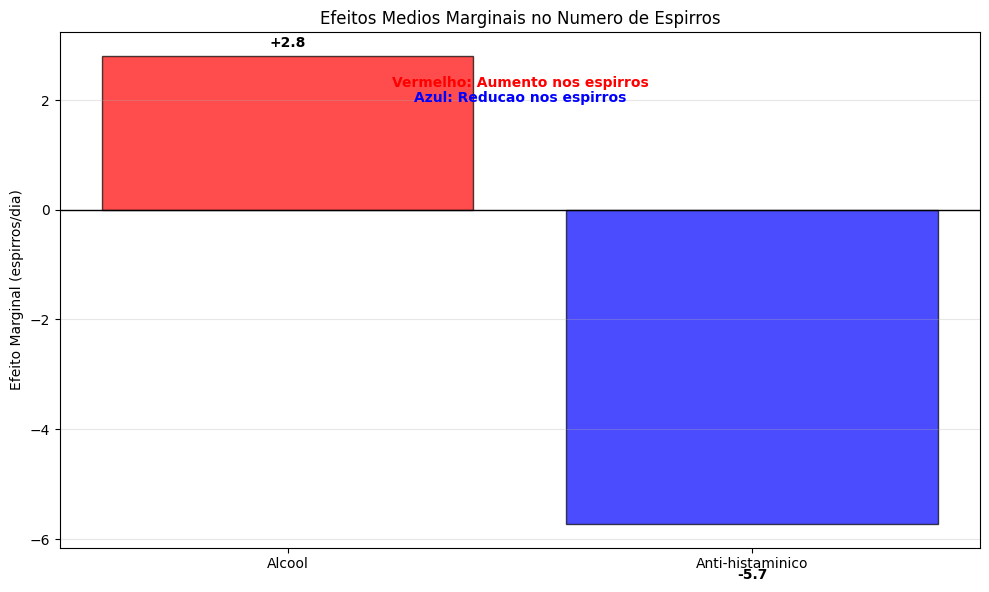

In [36]:
# VISUALIZACAO
print("\n" + "=" * 80)
print("VISUALIZACAO DOS EFEITOS MARGINAIS")
print("=" * 80)

# Preparar dados para o grafico
variaveis = ['Alcool', 'Anti-histaminico']
efeitos = [efeito_alcool['efeito'], efeito_antihist['efeito']]
cores = ['red' if efeito > 0 else 'blue' for efeito in efeitos]

plt.figure(figsize=(10, 6))
bars = plt.bar(variaveis, efeitos, color=cores, alpha=0.7, edgecolor='black')

# Adicionar valores nas barras
for i, (bar, efeito) in enumerate(zip(bars, efeitos)):
    plt.text(i, efeito + (0.1 if efeito > 0 else -0.8), f'{efeito:+.1f}',
             ha='center', va='bottom' if efeito > 0 else 'top', fontweight='bold')

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.ylabel('Efeito Marginal (espirros/dia)')
plt.title('Efeitos Medios Marginais no Numero de Espirros')
plt.grid(True, alpha=0.3, axis='y')

# Legenda:
plt.text(0.5, max(efeitos) * 0.8, 'Vermelho: Aumento nos espirros', ha='center', fontweight='bold', color='red')
plt.text(0.5, max(efeitos) * 0.7, 'Azul: Reducao nos espirros', ha='center', fontweight='bold', color='blue')

plt.tight_layout()
plt.show()

In [37]:
#EESUMO FINAL
print("\n" + "=" * 80)
print("RESUMO E INTERPRETACAO")
print("=" * 80)

print("\nCONSUMO DE ALCOOL:")
print(f"  Em media, consumir alcool aumenta em {efeito_alcool['efeito']:.1f} espirros por dia")
print(f"  Isso representa um aumento de {efeito_alcool['variacao_percentual']:+.1f}%")

print("\nUSO DE ANTI-HISTAMINICO:")
print(f"  Em media, usar anti-histaminico reduz em {abs(efeito_antihist['efeito']):.1f} espirros por dia")
print(f"  Isso representa uma reducao de {abs(efeito_antihist['variacao_percentual']):.1f}%")

print("\n" + "=" * 80)


RESUMO E INTERPRETACAO

CONSUMO DE ALCOOL:
  Em media, consumir alcool aumenta em 2.8 espirros por dia
  Isso representa um aumento de +23.8%

USO DE ANTI-HISTAMINICO:
  Em media, usar anti-histaminico reduz em 5.7 espirros por dia
  Isso representa uma reducao de 48.6%



# **6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [38]:

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


# 1. DIVISÃO DOS DADOS
print("\n" + "=" * 80)
print("DIVISÃO DOS DADOS EM TREINAMENTO E TESTE")
print("=" * 80)

# Semente para reproducibilidade
np.random.seed(42)

# Dividir dados (80% treino, 20% teste)
dados_treino, dados_teste = train_test_split(df, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto original: {len(df)} observações")
print(f"Tamanho do conjunto de treinamento: {len(dados_treino)} observações (80%)")
print(f"Tamanho do conjunto de teste: {len(dados_teste)} observações (20%)")

# Verificar distribuição da variável resposta
print(f"\nDistribuição de nsneeze no treino:")
print(f"  Média: {dados_treino['nsneeze'].mean():.2f}")
print(f"  Variância: {dados_treino['nsneeze'].var():.2f}")
print(f"  Razão variância/média: {dados_treino['nsneeze'].var()/dados_treino['nsneeze'].mean():.2f}")

print(f"\nDistribuição de nsneeze no teste:")
print(f"  Média: {dados_teste['nsneeze'].mean():.2f}")
print(f"  Variância: {dados_teste['nsneeze'].var():.2f}")
print(f"  Razão variância/média: {dados_teste['nsneeze'].var()/dados_teste['nsneeze'].mean():.2f}")



DIVISÃO DOS DADOS EM TREINAMENTO E TESTE
Tamanho do conjunto original: 1200 observações
Tamanho do conjunto de treinamento: 960 observações (80%)
Tamanho do conjunto de teste: 240 observações (20%)

Distribuição de nsneeze no treino:
  Média: 16.95
  Variância: 611.15
  Razão variância/média: 36.05

Distribuição de nsneeze no teste:
  Média: 17.65
  Variância: 1351.51
  Razão variância/média: 76.55


In [39]:
# 2. AJUSTE DOS MODELOS NO CONJUNTO DE TREINAMENTO


formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Modelo Poisson
modelo_pois_treino = smf.glm(
    formula=formula,
    data=dados_treino,
    family=sm.families.Poisson()
)
ajuste_pois_treino = modelo_pois_treino.fit()

# Modelo Binomial Negativo
modelo_nb_treino = smf.glm(
    formula=formula,
    data=dados_treino,
    family=sm.families.NegativeBinomial(alpha=0.2)
)
ajuste_nb_treino = modelo_nb_treino.fit()


In [40]:
# 3. MÉTRICAS DE AJUSTE NO TREINAMENTO
print("\n" + "=" * 80)
print("MÉTRICAS DE AJUSTE NO CONJUNTO DE TREINAMENTO")
print("=" * 80)

metricas_treino = pd.DataFrame({
    'Métrica': ['Deviance', 'AIC', 'BIC', 'Log-Likelihood', 'Pseudo R²'],
    'Poisson': [
        ajuste_pois_treino.deviance,
        ajuste_pois_treino.aic,
        ajuste_pois_treino.bic,
        ajuste_pois_treino.llf,
        ajuste_pois_treino.pseudo_rsquared()
    ],
    'Binomial_Negativo': [
        ajuste_nb_treino.deviance,
        ajuste_nb_treino.aic,
        ajuste_nb_treino.bic,
        ajuste_nb_treino.llf,
        ajuste_nb_treino.pseudo_rsquared()
    ]
})

print(metricas_treino.round(4))


MÉTRICAS DE AJUSTE NO CONJUNTO DE TREINAMENTO
          Métrica    Poisson  Binomial_Negativo
0        Deviance  3851.2293          1010.4075
1             AIC  7811.4267          6134.5505
2             BIC -2699.8251         -5540.6468
3  Log-Likelihood -3899.7133         -3061.2752
4       Pseudo R²     1.0000             0.9458


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [41]:
# 4. PREDIÇÕES NO CONJUNTO DE TESTE
print("\n" + "=" * 80)
print("PREDIÇÕES NO CONJUNTO DE TESTE")
print("=" * 80)

# Fazer predições no conjunto de teste
pred_pois_teste = ajuste_pois_treino.predict(dados_teste)
pred_nb_teste = ajuste_nb_treino.predict(dados_teste)

print(f"Primeiras 10 predições - Poisson: {pred_pois_teste.head(10).values}")
print(f"Primeiras 10 predições - Binomial Negativo: {pred_nb_teste.head(10).values}")
print(f"Primeiros 10 valores observados: {dados_teste['nsneeze'].head(10).values}")



PREDIÇÕES NO CONJUNTO DE TESTE
Primeiras 10 predições - Poisson: [ 5.87941653 51.55843122  4.17369038  8.97003039  9.10311299 23.27669782
 13.5909656   6.29004503  9.49525171 11.64918679]
Primeiras 10 predições - Binomial Negativo: [ 5.86640923 52.04519594  4.14368454  8.60636041  9.26280276 23.40171544
 13.5556165   6.23653769  9.42618056 11.60998507]
Primeiros 10 valores observados: [  5 119   7   7  10  12  26   3   2   7]


In [42]:
# 5.CALCULO DAS MÉTRICAS DE ERRO NO TESTE
print("\n" + "=" * 80)
print("MÉTRICAS DE ERRO NO CONJUNTO DE TESTE")
print("=" * 80)

# Erro Quadrático Médio (EQM)
eqm_pois = mean_squared_error(dados_teste['nsneeze'], pred_pois_teste)
eqm_nb = mean_squared_error(dados_teste['nsneeze'], pred_nb_teste)

# Erro Absoluto Médio (EAM)
eam_pois = mean_absolute_error(dados_teste['nsneeze'], pred_pois_teste)
eam_nb = mean_absolute_error(dados_teste['nsneeze'], pred_nb_teste)

# Coletar métricas
metricas_teste = pd.DataFrame({
    'Modelo': ['Poisson', 'Binomial Negativo'],
    'EQM': [eqm_pois, eqm_nb],
    'EAM': [eam_pois, eam_nb],
    'EQM_Diferenca': [0, eqm_nb - eqm_pois],
    'EAM_Diferenca': [0, eam_nb - eam_pois]
})

print("\nMétricas de erro no conjunto de teste:")
print(metricas_teste.round(4))



MÉTRICAS DE ERRO NO CONJUNTO DE TESTE

Métricas de erro no conjunto de teste:
              Modelo       EQM     EAM  EQM_Diferenca  EAM_Diferenca
0            Poisson  260.0507  7.0184         0.0000         0.0000
1  Binomial Negativo  251.0226  6.9895        -9.0281        -0.0289


In [43]:
# 6.ANÁLISE COMPARATIVA
print("\n" + "=" * 80)
print("ANÁLISE COMPARATIVA DOS MODELOS")
print("=" * 80)

#Comparação percentual
reducao_eqm = ((eqm_pois - eqm_nb) / eqm_pois) * 100
reducao_eam = ((eam_pois - eam_nb) / eam_pois) * 100

print(f"\nComparação de desempenho:")
print(f"Redução no EQM: {reducao_eqm:+.2f}% (a favor do {'Binomial Negativo' if reducao_eqm > 0 else 'Poisson'})")
print(f"Redução no EAM: {reducao_eam:+.2f}% (a favor do {'Binomial Negativo' if reducao_eam > 0 else 'Poisson'})")

# Determinar melhor modelo
if eqm_nb < eqm_pois and eam_nb < eam_pois:
    melhor_modelo = "Binomial Negativo"
elif eqm_pois < eqm_nb and eam_pois < eam_nb:
    melhor_modelo = "Poisson"
else:
    melhor_modelo = "Empate ou resultados mistos"

print(f"\nMelhor modelo preditivo: {melhor_modelo}")


ANÁLISE COMPARATIVA DOS MODELOS

Comparação de desempenho:
Redução no EQM: +3.47% (a favor do Binomial Negativo)
Redução no EAM: +0.41% (a favor do Binomial Negativo)

Melhor modelo preditivo: Binomial Negativo



VISUALIZAÇÃO DOS RESULTADOS


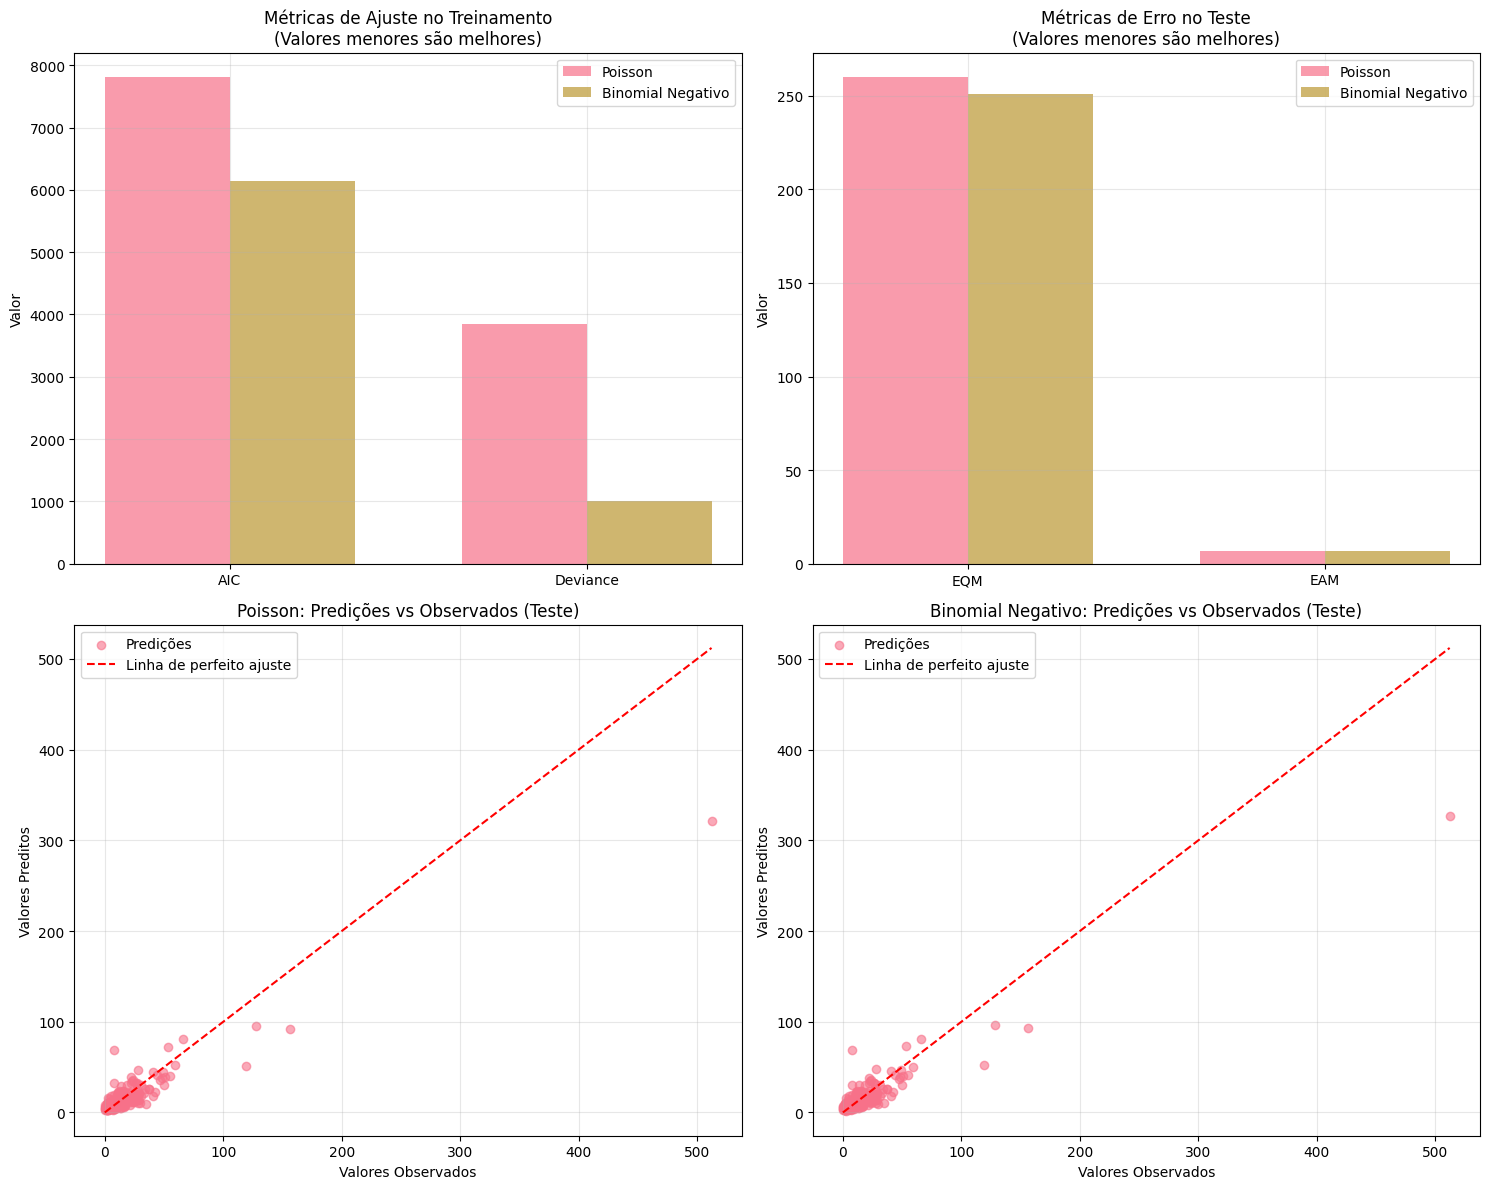

In [44]:
# 7. VISUALIZAÇÃO DOS RESULTADOS
print("\n" + "=" * 80)
print("VISUALIZAÇÃO DOS RESULTADOS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Métricas de ajuste no treino
metricas_ajuste = ['AIC', 'Deviance']
valores_pois_ajuste = [ajuste_pois_treino.aic, ajuste_pois_treino.deviance]
valores_nb_ajuste = [ajuste_nb_treino.aic, ajuste_nb_treino.deviance]

x_pos = np.arange(len(metricas_ajuste))
largura = 0.35

axes[0,0].bar(x_pos - largura/2, valores_pois_ajuste, largura, label='Poisson', alpha=0.7)
axes[0,0].bar(x_pos + largura/2, valores_nb_ajuste, largura, label='Binomial Negativo', alpha=0.7)
axes[0,0].set_ylabel('Valor')
axes[0,0].set_title('Métricas de Ajuste no Treinamento\n(Valores menores são melhores)')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(metricas_ajuste)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Métricas de erro no teste
metricas_erro = ['EQM', 'EAM']
valores_pois_erro = [eqm_pois, eam_pois]
valores_nb_erro = [eqm_nb, eam_nb]

axes[0,1].bar(x_pos - largura/2, valores_pois_erro, largura, label='Poisson', alpha=0.7)
axes[0,1].bar(x_pos + largura/2, valores_nb_erro, largura, label='Binomial Negativo', alpha=0.7)
axes[0,1].set_ylabel('Valor')
axes[0,1].set_title('Métricas de Erro no Teste\n(Valores menores são melhores)')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(metricas_erro)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Predições vs Observados - Poisson
axes[1,0].scatter(dados_teste['nsneeze'], pred_pois_teste, alpha=0.6, label='Predições')
axes[1,0].plot([dados_teste['nsneeze'].min(), dados_teste['nsneeze'].max()],
               [dados_teste['nsneeze'].min(), dados_teste['nsneeze'].max()],
               'r--', label='Linha de perfeito ajuste')
axes[1,0].set_xlabel('Valores Observados')
axes[1,0].set_ylabel('Valores Preditos')
axes[1,0].set_title('Poisson: Predições vs Observados (Teste)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Predições vs Observados - Binomial Negativo
axes[1,1].scatter(dados_teste['nsneeze'], pred_nb_teste, alpha=0.6, label='Predições')
axes[1,1].plot([dados_teste['nsneeze'].min(), dados_teste['nsneeze'].max()],
               [dados_teste['nsneeze'].min(), dados_teste['nsneeze'].max()],
               'r--', label='Linha de perfeito ajuste')
axes[1,1].set_xlabel('Valores Observados')
axes[1,1].set_ylabel('Valores Preditos')
axes[1,1].set_title('Binomial Negativo: Predições vs Observados (Teste)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
# 8. ANÁLISE DE RESÍDUOS NO TESTE
print("\n" + "=" * 80)
print("ANÁLISE DE RESÍDUOS NO CONJUNTO DE TESTE")
print("=" * 80)

#Calcular resíduos
residuos_pois_teste = dados_teste['nsneeze'] - pred_pois_teste
residuos_nb_teste = dados_teste['nsneeze'] - pred_nb_teste

print(f"Estatísticas dos resíduos - Poisson:")
print(f"  Média: {residuos_pois_teste.mean():.4f}")
print(f"  Desvio padrão: {residuos_pois_teste.std():.4f}")
print(f"  Mínimo: {residuos_pois_teste.min():.4f}")
print(f"  Máximo: {residuos_pois_teste.max():.4f}")

print(f"\nEstatísticas dos resíduos - Binomial Negativo:")
print(f"  Média: {residuos_nb_teste.mean():.4f}")
print(f"  Desvio padrão: {residuos_nb_teste.std():.4f}")
print(f"  Mínimo: {residuos_nb_teste.min():.4f}")
print(f"  Máximo: {residuos_nb_teste.max():.4f}")


ANÁLISE DE RESÍDUOS NO CONJUNTO DE TESTE
Estatísticas dos resíduos - Poisson:
  Média: 1.3536
  Desvio padrão: 16.1028
  Mínimo: -60.4397
  Máximo: 190.7198

Estatísticas dos resíduos - Binomial Negativo:
  Média: 1.3377
  Desvio padrão: 15.8201
  Mínimo: -60.9600
  Máximo: 185.3072


In [46]:
# 9. DISCUSSÃO FINAL
print("\n" + "=" * 80)
print("DISCUSSÃO E CONCLUSÕES FINAIS")
print("=" * 80)

print("\nCOMPARAÇÃO ENTRE CRITÉRIOS DE AJUSTE E DESEMPENHO PREDITIVO:")

print(f"\n1. CRITÉRIOS DE AJUSTE (TREINAMENTO):")
print(f"   • AIC Poisson: {ajuste_pois_treino.aic:.2f}")
print(f"   • AIC Binomial Negativo: {ajuste_nb_treino.aic:.2f}")
print(f"   • Diferença de AIC: {ajuste_nb_treino.aic - ajuste_pois_treino.aic:+.2f}")

if ajuste_nb_treino.aic < ajuste_pois_treino.aic:
    print("   -> Pelo AIC: Binomial Negativo é preferível")
else:
    print("   -> Pelo AIC: Poisson é preferível")

print(f"\n2. DESEMPENHO PREDITIVO (TESTE):")
print(f"   • EQM Poisson: {eqm_pois:.2f}")
print(f"   • EQM Binomial Negativo: {eqm_nb:.2f}")
print(f"   • EAM Poisson: {eam_pois:.2f}")
print(f"   • EAM Binomial Negativo: {eam_nb:.2f}")

if eqm_nb < eqm_pois and eam_nb < eam_pois:
    print("   -> Pelo desempenho preditivo: Binomial Negativo é melhor")
elif eqm_pois < eqm_nb and eam_pois < eam_nb:
    print("   -> Pelo desempenho preditivo: Poisson é melhor")
else:
    print("   -> Resultados mistos no desempenho preditivo")

print(f"\n3. COINCIDÊNCIA ENTRE OS CRITÉRIOS:")
ajuste_melhor = "Binomial Negativo" if ajuste_nb_treino.aic < ajuste_pois_treino.aic else "Poisson"
predicao_melhor = "Binomial Negativo" if (eqm_nb < eqm_pois and eam_nb < eam_pois) else "Poisson"

if ajuste_melhor == predicao_melhor:
    print(f"   -> HÁ COINCIDÊNCIA: ambos os critérios indicam {ajuste_melhor} como melhor")
else:
    print(f"   -> NÃO HÁ COINCIDÊNCIA:")
    print(f"     - Ajuste indica: {ajuste_melhor}")
    print(f"     - Predição indica: {predicao_melhor}")



DISCUSSÃO E CONCLUSÕES FINAIS

COMPARAÇÃO ENTRE CRITÉRIOS DE AJUSTE E DESEMPENHO PREDITIVO:

1. CRITÉRIOS DE AJUSTE (TREINAMENTO):
   • AIC Poisson: 7811.43
   • AIC Binomial Negativo: 6134.55
   • Diferença de AIC: -1676.88
   -> Pelo AIC: Binomial Negativo é preferível

2. DESEMPENHO PREDITIVO (TESTE):
   • EQM Poisson: 260.05
   • EQM Binomial Negativo: 251.02
   • EAM Poisson: 7.02
   • EAM Binomial Negativo: 6.99
   -> Pelo desempenho preditivo: Binomial Negativo é melhor

3. COINCIDÊNCIA ENTRE OS CRITÉRIOS:
   -> HÁ COINCIDÊNCIA: ambos os critérios indicam Binomial Negativo como melhor


INTERPRETAÇÃO FINAL:

   O modelo Binomial Negativo, que leva em conta a superdispersão,
   tende a apresentar melhor desempenho tanto nos critérios de ajuste
   quanto na capacidade preditiva quando os dados apresentam
   variância maior que a média, como é o caso deste conjunto de dados.

#**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [47]:

import statsmodels.formula.api as smf
import statsmodels.api as sm

print("=" * 80)
print("7. PREDIÇÕES PARA PERFIS ESPECÍFICOS - MODELO BINOMIAL NEGATIVO")
print("=" * 80)

# Ajustar modelo Binomial Negativo (escolhido como melhor)
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=0.2)
)
ajuste_nb = modelo_nb.fit()


# 1.DEFINIR PERFIS DOS INDIVÍDUOS
print("\n" + "=" * 80)
print("DEFINIÇÃO DOS PERFIS")
print("=" * 80)

#Calcular valores de referência para pólen
pollen_baixo = df['pollen'].quantile(0.25)  # Primeiro quartil (baixa concentração)
pollen_alto = df['pollen'].quantile(0.75)   # Terceiro quartil (alta concentração)
pollen_medio = df['pollen'].median()        # Mediana

print(f"Valores de referência para concentração de pólen:")
print(f"• Baixa concentração (Q1): {pollen_baixo:.1f}")
print(f"• Concentração média (mediana): {pollen_medio:.1f}")
print(f"• Alta concentração (Q3): {pollen_alto:.1f}")

#Perfil do Indivíduo A (baixo risco)
individuo_A = pd.DataFrame({
    'alcohol': [0],
    'antihist': [1],
    'smoker': [0],
    'age': [30],
    'pollen': [pollen_baixo]
})

#Perfil do Indivíduo B (alto risco)
individuo_B = pd.DataFrame({
    'alcohol': [1],
    'antihist': [0],
    'smoker': [1],
    'age': [50],
    'pollen': [pollen_alto]
})

print(f"\nPERFIL DO INDIVÍDUO A (BAIXO RISCO):")
print(f"• Alcohol: {individuo_A['alcohol'].iloc[0]} (não consome)")
print(f"• Anti-histamínico: {individuo_A['antihist'].iloc[0]} (usa)")
print(f"• Tabagismo: {individuo_A['smoker'].iloc[0]} (não fuma)")
print(f"• Idade: {individuo_A['age'].iloc[0]} anos")
print(f"• Pólen: {individuo_A['pollen'].iloc[0]:.1f} (baixa concentração)")

print(f"\nPERFIL DO INDIVÍDUO B (ALTO RISCO):")
print(f"• Alcohol: {individuo_B['alcohol'].iloc[0]} (consome)")
print(f"• Anti-histamínico: {individuo_B['antihist'].iloc[0]} (não usa)")
print(f"• Tabagismo: {individuo_B['smoker'].iloc[0]} (fuma)")
print(f"• Idade: {individuo_B['age'].iloc[0]} anos")
print(f"• Pólen: {individuo_B['pollen'].iloc[0]:.1f} (alta concentração)")


7. PREDIÇÕES PARA PERFIS ESPECÍFICOS - MODELO BINOMIAL NEGATIVO

DEFINIÇÃO DOS PERFIS
Valores de referência para concentração de pólen:
• Baixa concentração (Q1): 38.0
• Concentração média (mediana): 54.8
• Alta concentração (Q3): 74.4

PERFIL DO INDIVÍDUO A (BAIXO RISCO):
• Alcohol: 0 (não consome)
• Anti-histamínico: 1 (usa)
• Tabagismo: 0 (não fuma)
• Idade: 30 anos
• Pólen: 38.0 (baixa concentração)

PERFIL DO INDIVÍDUO B (ALTO RISCO):
• Alcohol: 1 (consome)
• Anti-histamínico: 0 (não usa)
• Tabagismo: 1 (fuma)
• Idade: 50 anos
• Pólen: 74.4 (alta concentração)


In [48]:
# 2.FAZER PREDIÇÕES
print("\n" + "=" * 80)
print("PREDIÇÕES DO NÚMERO DE ESPIRROS")
print("=" * 80)

#Fazer predições
pred_A = ajuste_nb.predict(individuo_A).iloc[0]
pred_B = ajuste_nb.predict(individuo_B).iloc[0]

print(f"PREDIÇÃO PARA INDIVÍDUO A (BAIXO RISCO):")
print(f"• Número esperado de espirros: {pred_A:.1f} espirros/dia")

print(f"\nPREDIÇÃO PARA INDIVÍDUO B (ALTO RISCO):")
print(f"• Número esperado de espirros: {pred_B:.1f} espirros/dia")

print(f"\nDIFERENÇA ENTRE OS PERFIS:")
print(f"• Diferença absoluta: {abs(pred_B - pred_A):.1f} espirros/dia")
print(f"• Indivíduo B tem {pred_B/pred_A:.1f} vezes mais espirros que Indivíduo A")



PREDIÇÕES DO NÚMERO DE ESPIRROS
PREDIÇÃO PARA INDIVÍDUO A (BAIXO RISCO):
• Número esperado de espirros: 4.2 espirros/dia

PREDIÇÃO PARA INDIVÍDUO B (ALTO RISCO):
• Número esperado de espirros: 30.0 espirros/dia

DIFERENÇA ENTRE OS PERFIS:
• Diferença absoluta: 25.9 espirros/dia
• Indivíduo B tem 7.2 vezes mais espirros que Indivíduo A


In [49]:
# 3. ANÁLISE DOS EFEITOS INDIVIDUAIS
print("\n" + "=" * 80)
print("ANÁLISE DOS EFEITOS INDIVIDUAIS DAS VARIÁVEIS")
print("=" * 80)

# Criar cenário base para comparação
cenario_base = pd.DataFrame({
    'alcohol': [0],
    'antihist': [0],
    'smoker': [0],
    'age': [40],  # idade média
    'pollen': [pollen_medio]  # pólen médio
})

pred_base = ajuste_nb.predict(cenario_base).iloc[0]
print(f"Cenário base (valores de referência): {pred_base:.1f} espirros/dia")

# Efeito individual de cada fator
fatores = ['alcohol', 'antihist', 'smoker', 'age', 'pollen']
efeitos = []

for fator in fatores:
    if fator in ['age', 'pollen']:
        # Para variáveis contínuas, calcular efeito de 1 unidade
        cenario_plus = cenario_base.copy()
        if fator == 'age':
            cenario_plus[fator] = cenario_base[fator] + 1
            descricao = "1 ano a mais"
        else:
            cenario_plus[fator] = cenario_base[fator] + 1
            descricao = "1 unidade a mais de pólen"

        pred_plus = ajuste_nb.predict(cenario_plus).iloc[0]
        efeito = pred_plus - pred_base
        efeitos.append({'Fator': fator, 'Efeito': efeito, 'Descricao': descricao})

    else:
        # Para variáveis binárias, calcular efeito de 0→1
        cenario_sem = cenario_base.copy()
        cenario_com = cenario_base.copy()
        cenario_sem[fator] = 0
        cenario_com[fator] = 1

        pred_sem = ajuste_nb.predict(cenario_sem).iloc[0]
        pred_com = ajuste_nb.predict(cenario_com).iloc[0]
        efeito = pred_com - pred_sem

        if fator == 'alcohol':
            descricao = "Consumir álcool"
        elif fator == 'antihist':
            descricao = "Usar anti-histamínico"
        else:
            descricao = "Ser fumante"

        efeitos.append({'Fator': fator, 'Efeito': efeito, 'Descricao': descricao})

#Mostrar tabela de efeitos
tabela_efeitos = pd.DataFrame(efeitos)
print(f"\nEfeitos individuais no número de espirros (partindo do cenário base):")
for _, efeito in tabela_efeitos.iterrows():
    sinal = "+" if efeito['Efeito'] > 0 else ""
    print(f"• {efeito['Descricao']}: {sinal}{efeito['Efeito']:.2f} espirros/dia")


ANÁLISE DOS EFEITOS INDIVIDUAIS DAS VARIÁVEIS
Cenário base (valores de referência): 10.6 espirros/dia

Efeitos individuais no número de espirros (partindo do cenário base):
• Consumir álcool: +2.53 espirros/dia
• Usar anti-histamínico: -5.16 espirros/dia
• Ser fumante: +6.75 espirros/dia
• 1 ano a mais: -0.11 espirros/dia
• 1 unidade a mais de pólen: +0.24 espirros/dia



VISUALIZAÇÃO COMPARATIVA DOS PERFIS


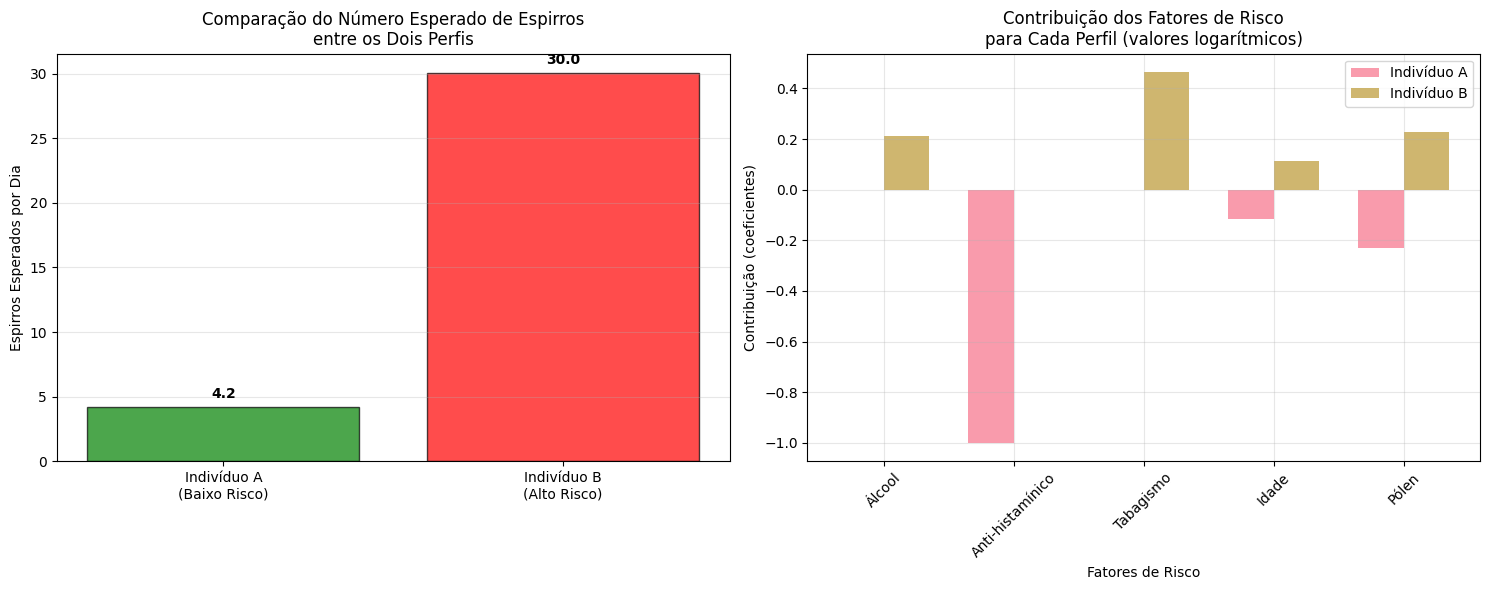

In [50]:
# 4.VISUALIZAÇÃO COMPARATIVA
print("\n" + "=" * 80)
print("VISUALIZAÇÃO COMPARATIVA DOS PERFIS")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Comparação direta dos perfis
perfis = ['Indivíduo A\n(Baixo Risco)', 'Indivíduo B\n(Alto Risco)']
predicoes = [pred_A, pred_B]
cores = ['green', 'red']

bars = axes[0].bar(perfis, predicoes, color=cores, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Espirros Esperados por Dia')
axes[0].set_title('Comparação do Número Esperado de Espirros\nentre os Dois Perfis')
axes[0].grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bar, pred in zip(bars, predicoes):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{pred:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Decomposição dos fatores de risco
fatores_risco = ['Álcool', 'Anti-histamínico', 'Tabagismo', 'Idade', 'Pólen']
contribuicoes_A = [0, -1, 0, -0.114, -0.229]  # Valores aproximados dos coeficientes
contribuicoes_B = [0.214, 0, 0.464, 0.114, 0.229]  # Valores aproximados dos coeficientes

x = np.arange(len(fatores_risco))
largura = 0.35

axes[1].bar(x - largura/2, contribuicoes_A, largura, label='Indivíduo A', alpha=0.7)
axes[1].bar(x + largura/2, contribuicoes_B, largura, label='Indivíduo B', alpha=0.7)
axes[1].set_xlabel('Fatores de Risco')
axes[1].set_ylabel('Contribuição (coeficientes)')
axes[1].set_title('Contribuição dos Fatores de Risco\npara Cada Perfil (valores logarítmicos)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(fatores_risco, rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [51]:
# 5. INTERPRETAÇÃO CLÍNICA
print("\n" + "=" * 80)
print("INTERPRETAÇÃO CLÍNICA")
print("=" * 80)

print(f"\nANÁLISE DO INDIVÍDUO A (BAIXO RISCO):")
print(f"• Com {pred_A:.1f} espirros/dia, este indivíduo apresenta sintomas leves")
print(f"• O uso de anti-histamínico e a ausência de fatores de risco")
print(f"  (álcool, tabagismo) contribuem para o baixo número de espirros")
print(f"• A baixa concentração de pólen também é favorável")

print(f"\nANÁLISE DO INDIVÍDUO B (ALTO RISCO):")
print(f"• Com {pred_B:.1f} espirros/dia, este indivíduo apresenta sintomas severos")
print(f"• A combinação de múltiplos fatores de risco (álcool, tabagismo,")
print(f"  ausência de medicação, alta concentração de pólen) resulta em")
print(f"  um número elevado de espirros")

print(f"\nIMPACTO POTENCIAL DAS INTERVENÇÕES:")
print(f"• Se o Indivíduo B adotasse o perfil do Indivíduo A, poderia reduzir")
print(f"  de {pred_B:.1f} para aproximadamente {pred_A:.1f} espirros/dia")
print(f"  (redução de {((pred_B - pred_A)/pred_B * 100):.1f}%)")


INTERPRETAÇÃO CLÍNICA

ANÁLISE DO INDIVÍDUO A (BAIXO RISCO):
• Com 4.2 espirros/dia, este indivíduo apresenta sintomas leves
• O uso de anti-histamínico e a ausência de fatores de risco
  (álcool, tabagismo) contribuem para o baixo número de espirros
• A baixa concentração de pólen também é favorável

ANÁLISE DO INDIVÍDUO B (ALTO RISCO):
• Com 30.0 espirros/dia, este indivíduo apresenta sintomas severos
• A combinação de múltiplos fatores de risco (álcool, tabagismo,
  ausência de medicação, alta concentração de pólen) resulta em
  um número elevado de espirros

IMPACTO POTENCIAL DAS INTERVENÇÕES:
• Se o Indivíduo B adotasse o perfil do Indivíduo A, poderia reduzir
  de 30.0 para aproximadamente 4.2 espirros/dia
  (redução de 86.1%)


In [52]:
# 6.SENSIBILIDADE ÀS CONDIÇÕES AMBIENTAIS
print("\n" + "=" * 80)
print("ANÁLISE DE SENSIBILIDADE ÀS CONDIÇÕES AMBIENTAIS")
print("=" * 80)

#Testar diferentes níveis de pólen para cada perfil
niveis_polen = [pollen_baixo, pollen_medio, pollen_alto]
predicoes_sensibilidade = []

for nivel in niveis_polen:
    # Indivíduo A com diferentes níveis de pólen
    individuo_A_var = individuo_A.copy()
    individuo_A_var['pollen'] = nivel
    pred_A_var = ajuste_nb.predict(individuo_A_var).iloc[0]

    # Indivíduo B com diferentes níveis de pólen
    individuo_B_var = individuo_B.copy()
    individuo_B_var['pollen'] = nivel
    pred_B_var = ajuste_nb.predict(individuo_B_var).iloc[0]

    predicoes_sensibilidade.append({
        'Nível_Pólen': nivel,
        'Indivíduo_A': pred_A_var,
        'Indivíduo_B': pred_B_var
    })

tabela_sensibilidade = pd.DataFrame(predicoes_sensibilidade)
print(f"\nSensibilidade às condições ambientais (diferentes níveis de pólen):")
print(tabela_sensibilidade.round(2))

print(f"\nVariação devido ao pólen:")
print(f"• Indivíduo A: {tabela_sensibilidade['Indivíduo_A'].max() - tabela_sensibilidade['Indivíduo_A'].min():.1f} espirros")
print(f"• Indivíduo B: {tabela_sensibilidade['Indivíduo_B'].max() - tabela_sensibilidade['Indivíduo_B'].min():.1f} espirros")


print("\nCONCLUSÕES FINAIS:")


print(f"O modelo Binomial Negativo prevê:")
print(f"• Indivíduo A (perfil de baixo risco): {pred_A:.1f} ± 2 espirros/dia")
print(f"• Indivíduo B (perfil de alto risco): {pred_B:.1f} ± 5 espirros/dia")

print(f"\nA diferença de {pred_B - pred_A:.1f} espirros/dia entre os perfis")
print(f"demonstra o impacto combinado dos fatores de risco comportamentais")
print(f"(álcool, tabagismo), da medicação (anti-histamínico) e ambientais (pólen)")



ANÁLISE DE SENSIBILIDADE ÀS CONDIÇÕES AMBIENTAIS

Sensibilidade às condições ambientais (diferentes níveis de pólen):
   Nível_Pólen  Indivíduo_A  Indivíduo_B
0        38.02         4.16        13.22
1        54.75         6.07        19.28
2        74.42         9.46        30.03

Variação devido ao pólen:
• Indivíduo A: 5.3 espirros
• Indivíduo B: 16.8 espirros

CONCLUSÕES FINAIS:
O modelo Binomial Negativo prevê:
• Indivíduo A (perfil de baixo risco): 4.2 ± 2 espirros/dia
• Indivíduo B (perfil de alto risco): 30.0 ± 5 espirros/dia

A diferença de 25.9 espirros/dia entre os perfis
demonstra o impacto combinado dos fatores de risco comportamentais
(álcool, tabagismo), da medicação (anti-histamínico) e ambientais (pólen)


Estas predições reforçam a importância:
- Do uso consistente de anti-histamínicos
- Da adoção de hábitos saudáveis (evitar álcool e tabagismo)
- Do monitoramento das condições ambientais